### <font size=5>**Advanced Linear Regression - Surprise Housing**</font>
***

#### <font color='#000080' size=5>***Background:***</font>

</br>
<font size=3 font-family:"Calibri">
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The company is looking at prospective properties to buy to enter the market. </font>
</br>

#### <font color='#000080' size=5>***Business Goal:***</font>

</br>
<font size=3 font-family:"Calibri">
Required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of the new market.
</font>

#### <font color='#000080' size=5>***Objective:***</font>
</br>
<font size=3 font-family:"Calibri">
Need to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
</font>
</br>
<font size=3> 1. Which variables are significant in predicting the price of a house.</font>
</br>
<font size=3> 2. How well those variables describe the price of a house.</font>

#### <font color='#000080' size=5>***1. Exploratory Data Analysis:***</font>

#### <font color='black' size=3.2>1.1 Data Sourcing</font>

In [628]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 85

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [629]:
#Read housing dataset
housing_df = pd.read_csv("C:\Users\sridhaya\Downloads\train.csv")
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [630]:
#Understanding dataset
housing_df.shape

(1460, 81)

In [631]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [632]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### <font color='black' size=3.2>1.2 Data Cleaning</font>

In [633]:
#--------------------------- Check for Duplicate rows--------------------------- 
print(housing_df.shape)
duplicate_check_df = housing_df.copy()
duplicate_check_df.drop_duplicates(inplace=True)
print(duplicate_check_df.shape)

(1460, 81)
(1460, 81)


In [634]:
#--------------------------- Data Type mismatch --------------------------- 
# Converting to object as these three are categorical variables
housing_df[['MSSubClass', 'OverallQual', 'OverallCond']] = housing_df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
# Convert two columns to 'numeric' type 
housing_df['LotFrontage'] = pd.to_numeric(housing_df['LotFrontage'], errors='coerce')
housing_df['MasVnrArea'] = pd.to_numeric(housing_df['MasVnrArea'], errors='coerce')

#Check whether the data types of five columns have changed
housing_df[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [635]:
#Certain Columns have NA impyling not the missing data, but certain catergory. So replace those values with correct categorical values
housing_df['Alley'].fillna('No Alley',inplace=True)
housing_df['BsmtQual'].fillna('No Basement',inplace=True)
housing_df['BsmtCond'].fillna('No Basement',inplace=True)
housing_df['BsmtExposure'].fillna('No Basement',inplace=True)
housing_df['BsmtFinType1'].fillna('No Basement',inplace=True)
housing_df['BsmtFinType2'].fillna('No Basement',inplace=True)
housing_df['FireplaceQu'].fillna('No Fireplace',inplace=True)
housing_df['GarageType'].fillna('No Garage',inplace=True)
housing_df['GarageFinish'].fillna('No Garage',inplace=True)
housing_df['GarageQual'].fillna('No Garage',inplace=True)
housing_df['GarageCond'].fillna('No Garage',inplace=True)
housing_df['PoolQC'].fillna('No Pool',inplace=True)
housing_df['Fence'].fillna('No Fence',inplace=True)
housing_df['MiscFeature'].fillna('None',inplace=True)

In [636]:
#---------------------------  Missing values --------------------------- 
housing_df.isnull().sum()[housing_df.isnull().sum() > 0].sort_values(ascending=False)

MasVnrType     872
LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
Electrical       1
dtype: int64

In [637]:
#LotFrontage is the Linear feet of street connected to property. For missing values we can impute the same with mean value
#MasVnrArea  is the Masonry veneer area in square feet. For missing values we can impute the same with  mean value
housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].mean(), inplace=True)
housing_df[ 'MasVnrArea'].fillna(housing_df[ 'MasVnrArea'].mean(), inplace=True)

In [638]:
housing_df['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [639]:
#Considering most of the houses are with Electrical system as "Standard Circuit Breakers & Romex", imputing missing value with this category
housing_df['Electrical'].fillna("SBrkr", inplace=True)

In [640]:
housing_df['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [641]:
#Considering most of the houses are with Masonry veneer type 'BrkFace', imputing missing values with this category
housing_df['MasVnrType'].fillna("BrkFace", inplace=True)

In [642]:
housing_df.isnull().sum()[housing_df.isnull().sum() > 0].sort_values(ascending=False)

GarageYrBlt    81
dtype: int64

In [643]:
#Since GarageYrBlt corresponds to No Garage in the house, no need to impute the value for this

In [644]:
#---------------------------  Derived Variables --------------------------- 

In [645]:
#Create a new column called Remodeled that states whether the house was remodelded or not: 1 if YearRemodAdd > YearBuilt else 0
print(housing_df[['YearRemodAdd','YearBuilt']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   YearRemodAdd  1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None


In [646]:
housing_df.loc[housing_df.YearRemodAdd > housing_df.YearBuilt, 'Remodeled'] = 1
housing_df.loc[housing_df.YearRemodAdd <= housing_df.YearBuilt, 'Remodeled'] = 0
print(housing_df['Remodeled'].value_counts())

Remodeled
0.0    764
1.0    696
Name: count, dtype: int64


In [647]:
#Create a new column called House_age_at_sale, which is ideally when the house was sold, how old was it?
housing_df['House_age_at_sale']=housing_df['YrSold'] - housing_df['YearBuilt']
housing_df[['YrSold','YearBuilt','House_age_at_sale']].head()

,YrSold,YearBuilt,House_age_at_sale
0,2008,2003,5
1,2007,1976,31
2,2008,2001,7
3,2006,1915,91
4,2008,2000,8


In [648]:
housing_df['Remodeled_House_age_at_sale']=housing_df['Remodeled'].apply(lambda x: 1 if x==1 else 0)
housing_df.loc[housing_df['Remodeled_House_age_at_sale'] == 1, 'Remodeled_House_age_at_sale'] = housing_df['YrSold'] - housing_df['YearRemodAdd']
housing_df[['YrSold','YearBuilt','House_age_at_sale','Remodeled','YearRemodAdd','Remodeled_House_age_at_sale']].head()

,YrSold,YearBuilt,House_age_at_sale,Remodeled,YearRemodAdd,Remodeled_House_age_at_sale
0,2008,2003,5,0.0,2003,0
1,2007,1976,31,0.0,1976,0
2,2008,2001,7,1.0,2002,6
3,2006,1915,91,1.0,1970,36
4,2008,2000,8,0.0,2000,0


In [649]:
#--------------------------- Remove unnecessary columns --------------------------- 

In [650]:
#Drop these columns
columns_to_drop=['Id','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
housing_df = housing_df.drop(columns=columns_to_drop, axis=1)
housing_df.shape

(1460, 79)

In [651]:
#--------------------------- Check for outliers in continuous variables --------------------------- 
housing_df.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Remodeled,House_age_at_sale,Remodeled_House_age_at_sale
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,0.476712,36.547945,10.095890
std,22.024023,9981.264932,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,0.499629,30.250152,18.628885
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,-1.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,0.000000,8.000000,0.000000
50%,70.049958,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,0.000000,35.000000,0.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,1.000000,54.000000,10.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,1.000000,136.000000,60.000000


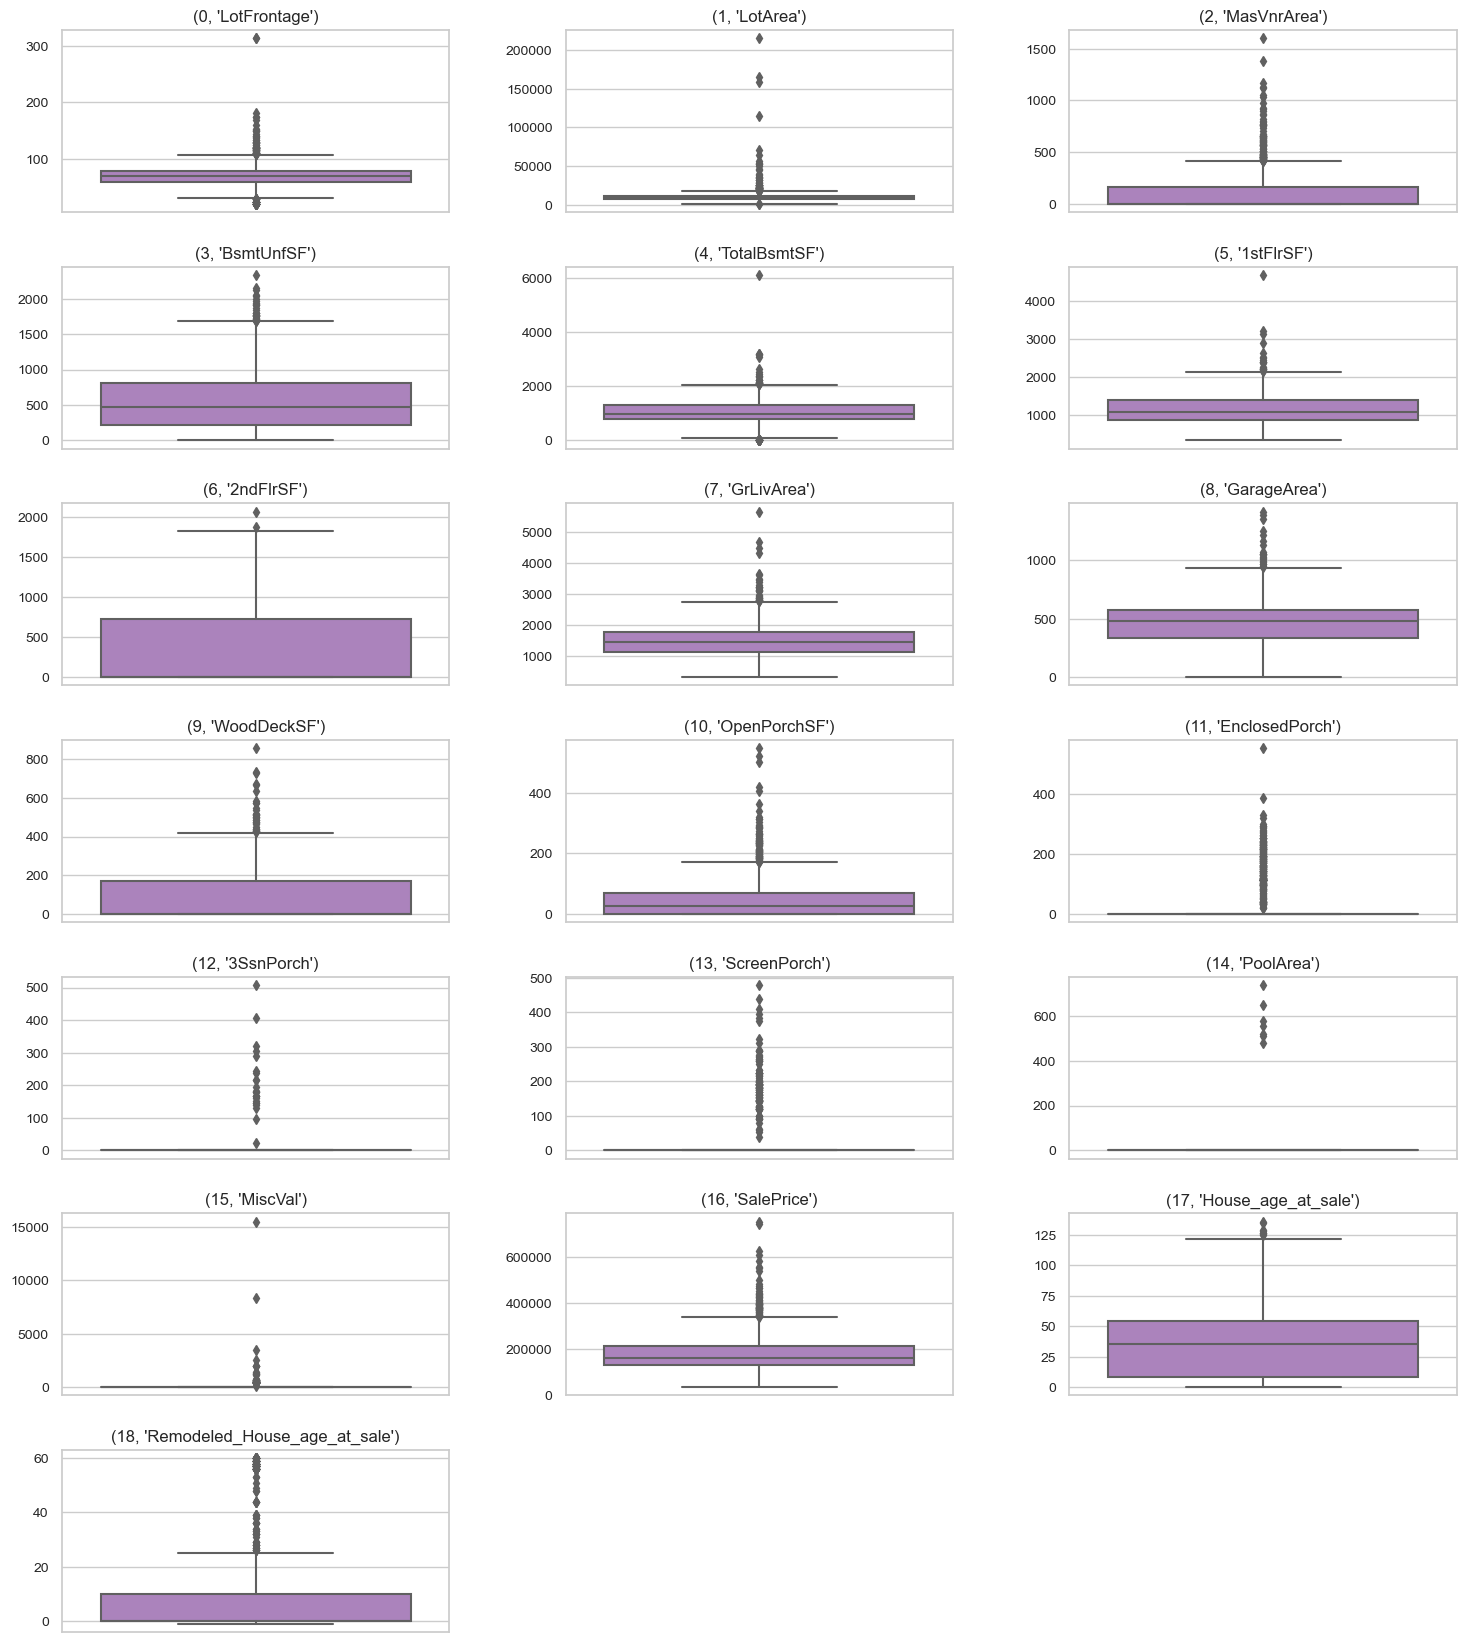

In [652]:
#Check outliers in Numeric variables
housing_df_num=['LotFrontage', 'LotArea', 'MasVnrArea', 
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice',  'House_age_at_sale',
       'Remodeled_House_age_at_sale']

plt.figure(figsize=(18, 18))
plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=0.3, wspace=0.3)
for i in enumerate(housing_df_num):
    plt.subplot(7,3,i[0]+1)
    g=sns.boxplot(y = housing_df[i[1]], orient = "h", color = "#AF7AC5")
    plt.title(i, fontsize=12)
    g.tick_params(labelsize=10)
    plt.xlabel("")
    plt.ylabel("")
plt.show()

(1430, 79)


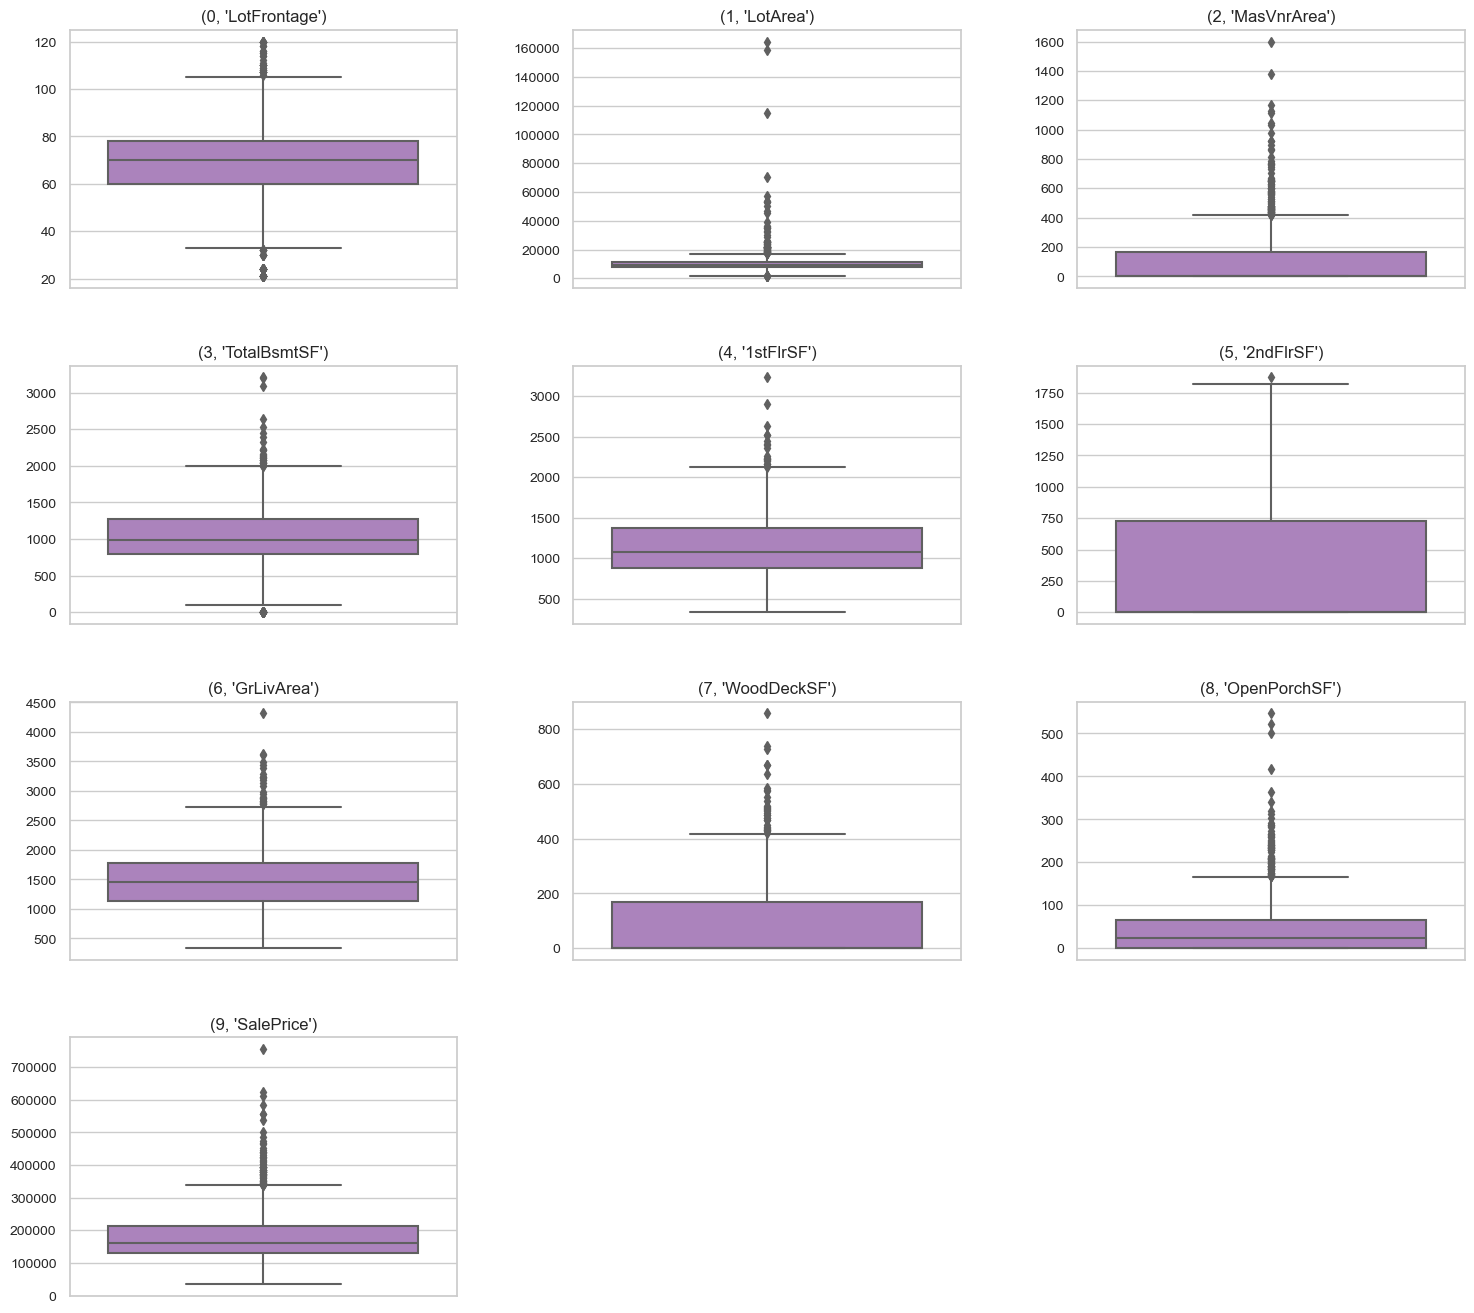

In [653]:
#Removing outliers in LotFrontage 
outlier_cols=['LotFrontage', 'LotArea', 'MasVnrArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','WoodDeckSF', 
              'OpenPorchSF','SalePrice']
LotFrontage_98_perct= housing_df['LotFrontage'].quantile(0.98)
housing_df = housing_df[housing_df['LotFrontage'] <= LotFrontage_98_perct]
print(housing_df.shape)

plt.figure(figsize=(18, 18))
plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=0.3, wspace=0.3)
for i in enumerate(outlier_cols):
    plt.subplot(5,3,i[0]+1)
    g=sns.boxplot(y = housing_df[i[1]], orient = "h", color = "#AF7AC5")
    plt.title(i, fontsize=12)
    g.tick_params(labelsize=10)
    plt.xlabel("")
    plt.ylabel("")
plt.show()

(1415, 79)


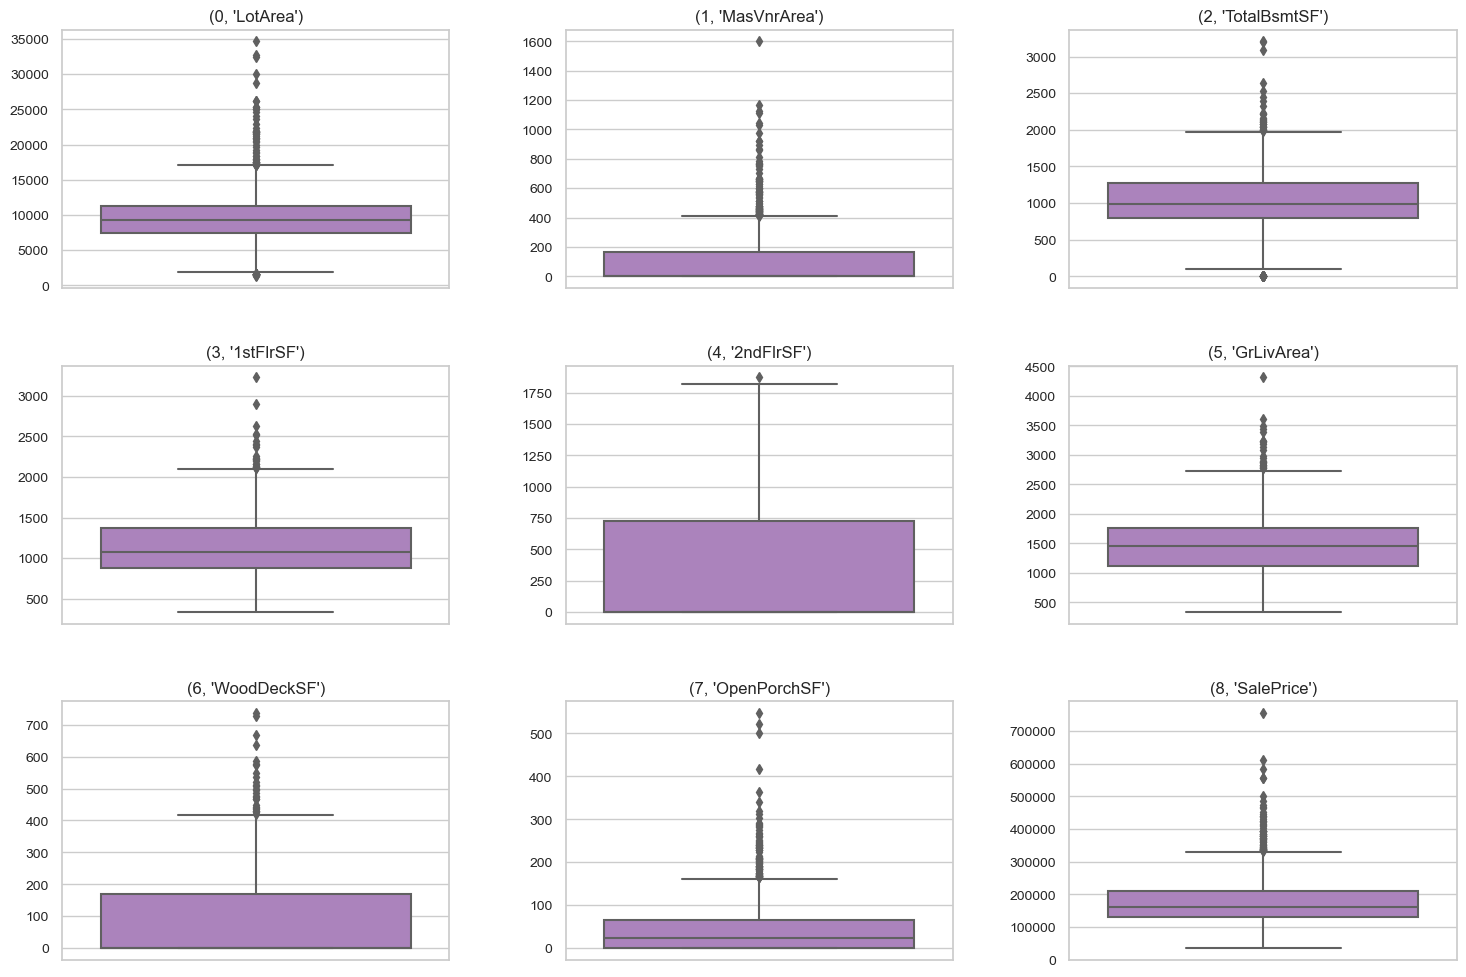

In [654]:
#Removing outliers in LotArea 
outlier_cols=['LotArea', 'MasVnrArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','WoodDeckSF', 
              'OpenPorchSF','SalePrice']
LotArea_98_perct= housing_df['LotArea'].quantile(0.99)
housing_df = housing_df[housing_df['LotArea'] <= LotArea_98_perct]
print(housing_df.shape)

plt.figure(figsize=(18, 18))
plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=0.3, wspace=0.3)
for i in enumerate(outlier_cols):
    plt.subplot(5,3,i[0]+1)
    g=sns.boxplot(y = housing_df[i[1]], orient = "h", color = "#AF7AC5")
    plt.title(i, fontsize=12)
    g.tick_params(labelsize=10)
    plt.xlabel("")
    plt.ylabel("")
plt.show()

In [655]:
housing_df.shape

(1415, 79)

> <font color='#006400' size=4.8><span style="text-decoration:underline">***Observations:***</span></br></font>
> </br>
> <font size=3.5> - Convert Datatype of MSSubClass,OverallQual and OverallCond to Object as these are categorical variables </font>
> </br> 
> <font size=3.5> - Convert Datatype of LotFrontage and MasVnrArea to Numeric type </font>
> </br> 
> <font size=3.5> - Certain Columns have NA impyling not the missing data, but certain catergory. So replace those values with correct categorical values </font>
> </br> 
> <font size=3.5> - Impute NULL values in LotFrontage and MasVnrArea with their corresponding mean values </font>
> </br> 
> <font size=3.5> - Impute missing values under 'Electrical' to 'SBrkr' </font>
> </br> 
> <font size=3.5> - Impute missing values under 'MasVnrType' to 'BrkFace' </font>
> </br> 
> <font size=3.5> - Create Derived Variables: Remodeled, House_age_at_sale, Remodeled_House_age_at_sale </font>
> </br> 
> <font size=3.5> - Remove unnecessary columns: Id, YearBuilt, YearRemodAdd, GarageYrBlt and YrSold </font>
> </br> 
> <font size=3.5> - Remove Outliers: LotFrontage, LotArea </font>
> </br> 

#### <font color='black' size=3.2>1.3 Univariate Analysis</font>

In [656]:
#Set the Styling parameter for the graphs
sns.set(style="whitegrid", color_codes=True)

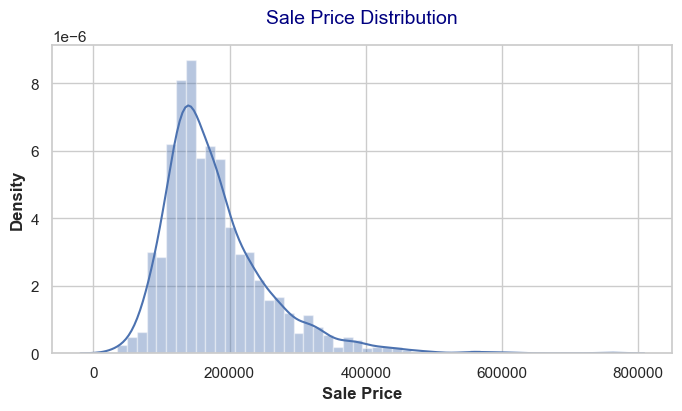

In [657]:
#Check the distribution of target variable
plt.figure(figsize=(8, 4))
sns.distplot(housing_df['SalePrice'])
plt.xlabel("Sale Price",fontweight='bold',fontsize=12)
plt.ylabel("Density",fontweight='bold',fontsize=12)
plt.title('Sale Price Distribution',pad=16, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
plt.show()

In [658]:
#Analyzing the distribution of categorical variables

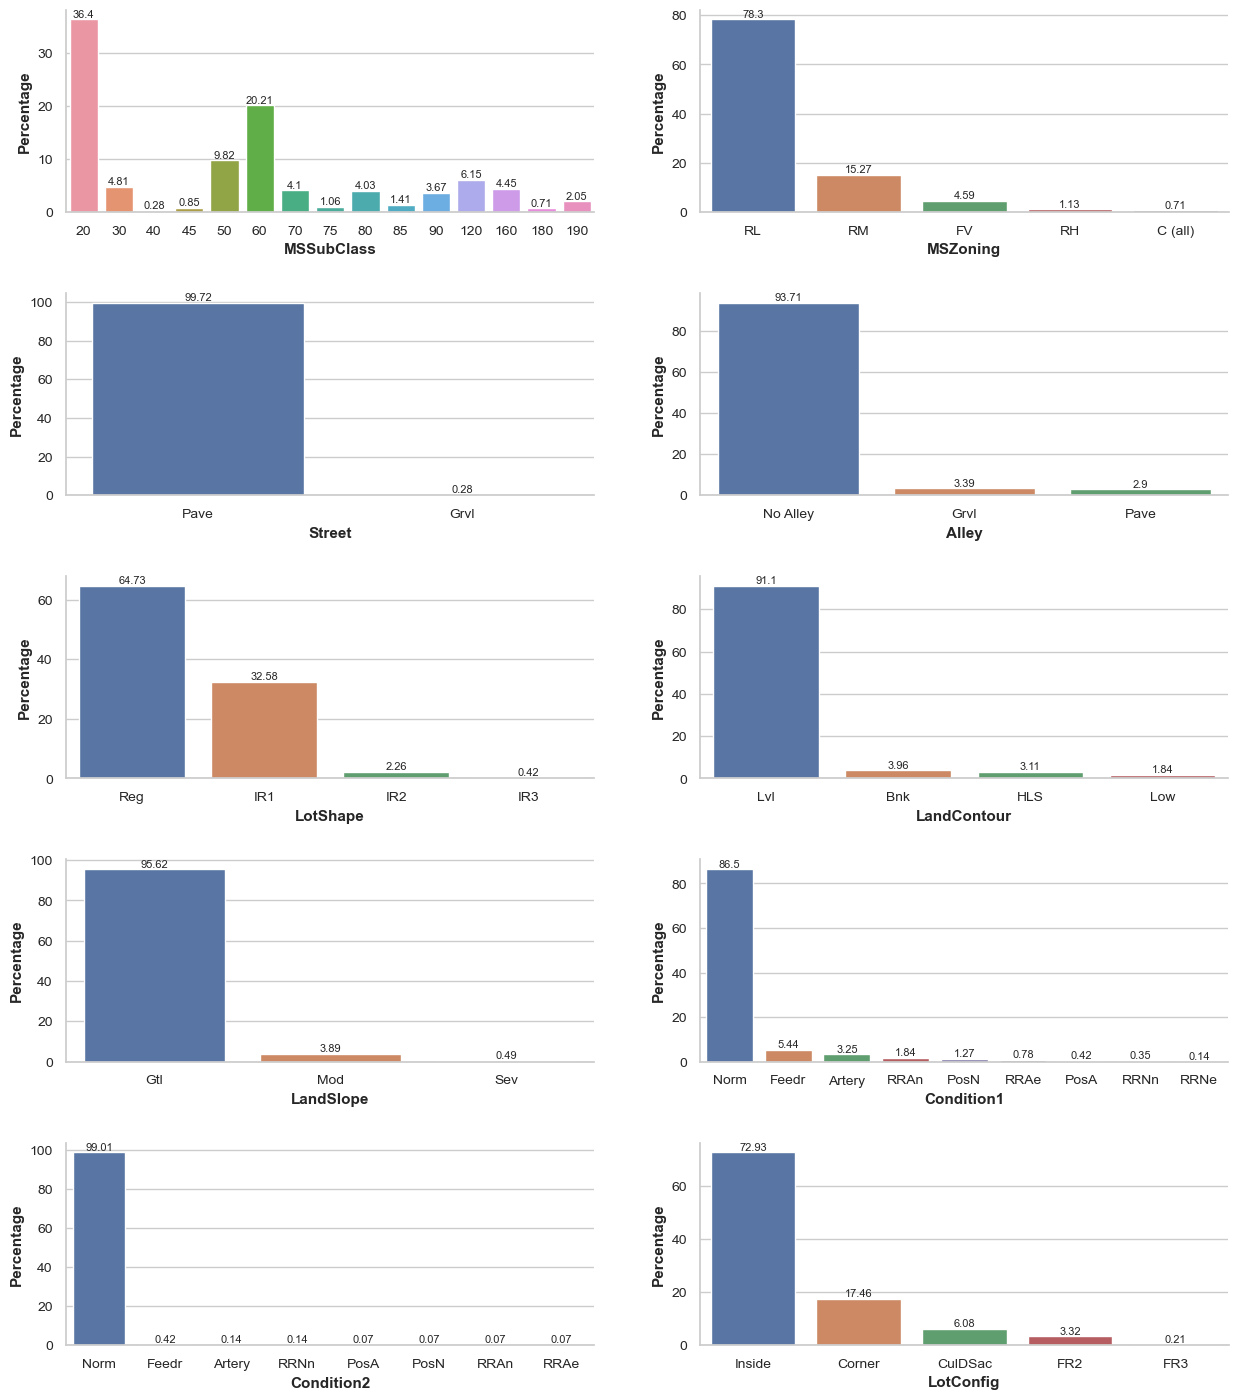

In [659]:
#Analyzing the distribution of Dwelling Type
housing_df_cat = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','LandSlope','Condition1',
                 'Condition2','LotConfig']

plt.figure(figsize=(15, 15))
plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=0.4, wspace=0.2)
for i in enumerate(housing_df_cat):
    plt.subplot(5,2,i[0]+1)
    barplotresult = sns.barplot(data=housing_df, 
                                x=housing_df[i[1]].value_counts().index, 
                                y=housing_df[i[1]].value_counts(normalize=True).mul(100).round(2))
    plt.xlabel(i[1],fontweight='bold',fontsize=11)
    plt.ylabel('Percentage',fontweight='bold',fontsize=11)
    for i in barplotresult.containers:
        barplotresult.bar_label(i,fontsize=8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    gca = plt.gca()
    gca.spines['top'].set_visible(False)
    gca.spines['right'].set_visible(False)

plt.show()

In [660]:
#Most of the houses sold were "1-1/2 STORY FINISHED ALL AGES" and With "2-STORY 1946 & NEWER", when compared to other categories
#Majority of the houses (around 78%) is with the zone category of "Residential Low Density"
#More than 90% of the houses have paved access to the property but with no alley access
#Majority of the houses sold were the ones which are Regular in shape and nearly flat and gentle slope without major elevation from ground level

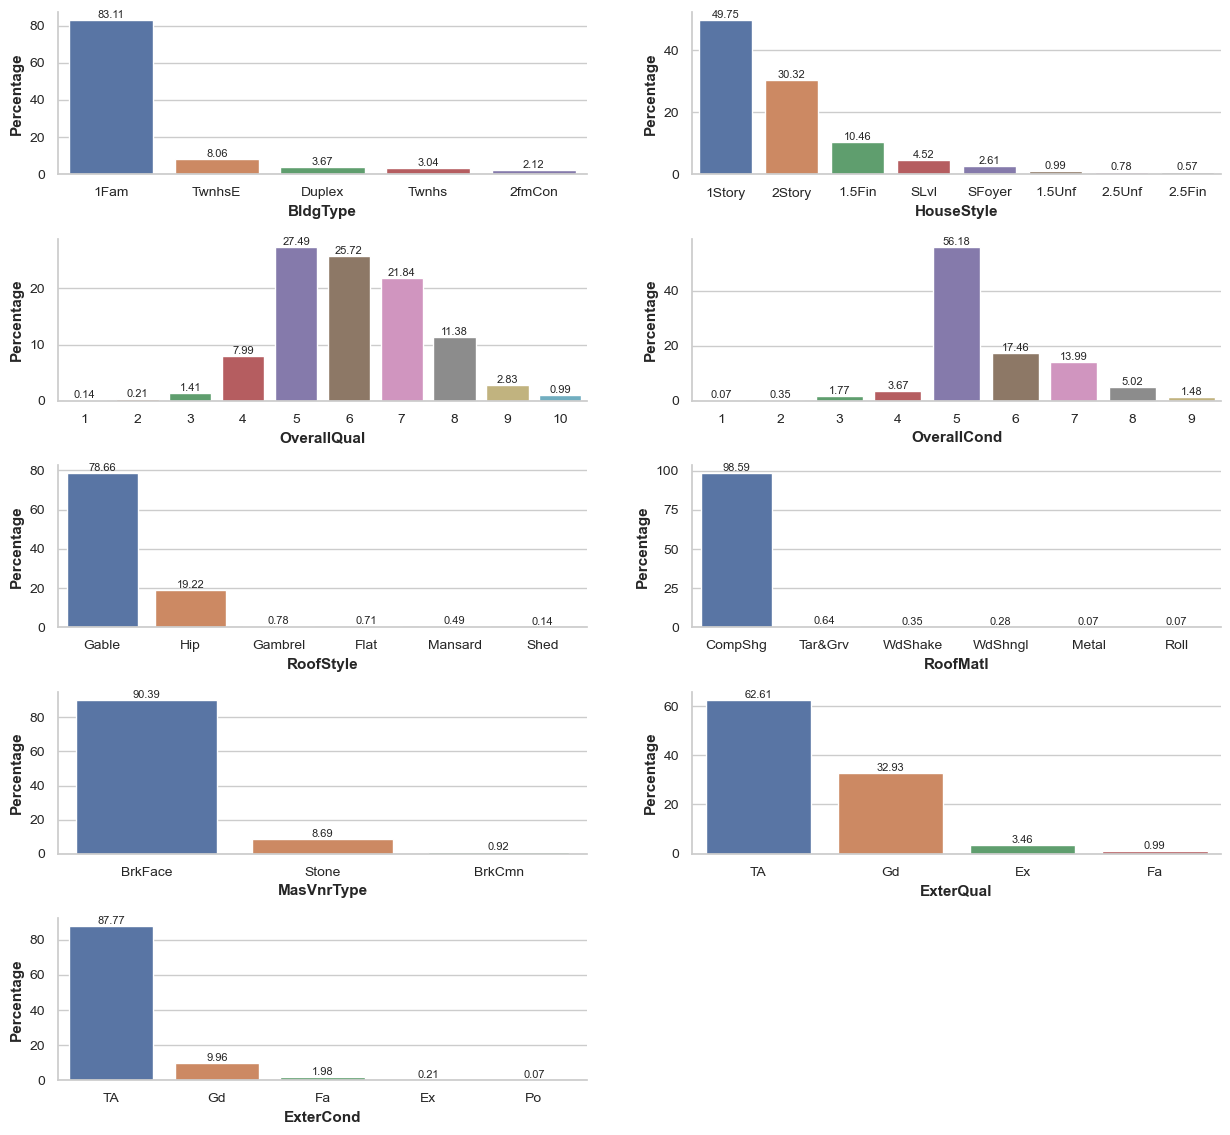

In [661]:
#Analyzing the distribution of Building Type
housing_df_cat = ['BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl',
                 'MasVnrType','ExterQual','ExterCond']

plt.figure(figsize=(15, 12))
plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=0.4, wspace=0.2)
for i in enumerate(housing_df_cat):
    plt.subplot(5,2,i[0]+1)
    barplotresult = sns.barplot(data=housing_df, 
                                x=housing_df[i[1]].value_counts().index, 
                                y=housing_df[i[1]].value_counts(normalize=True).mul(100).round(2))
    plt.xlabel(i[1],fontweight='bold',fontsize=11)
    plt.ylabel('Percentage',fontweight='bold',fontsize=11)
    for i in barplotresult.containers:
        barplotresult.bar_label(i,fontsize=8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    gca = plt.gca()
    gca.spines['top'].set_visible(False)
    gca.spines['right'].set_visible(False)

plt.show()

In [662]:
#More than 80% of the houses are for the dwelling of Single-family Detached as expected. So naturally people would prefer 1 story buldings than larger ones.
#Most of the houses sold were with average and above average ratings and also with average quality.
#More than 75% of the houses are with Gable roofs made up of Standard (Composite) Shingle

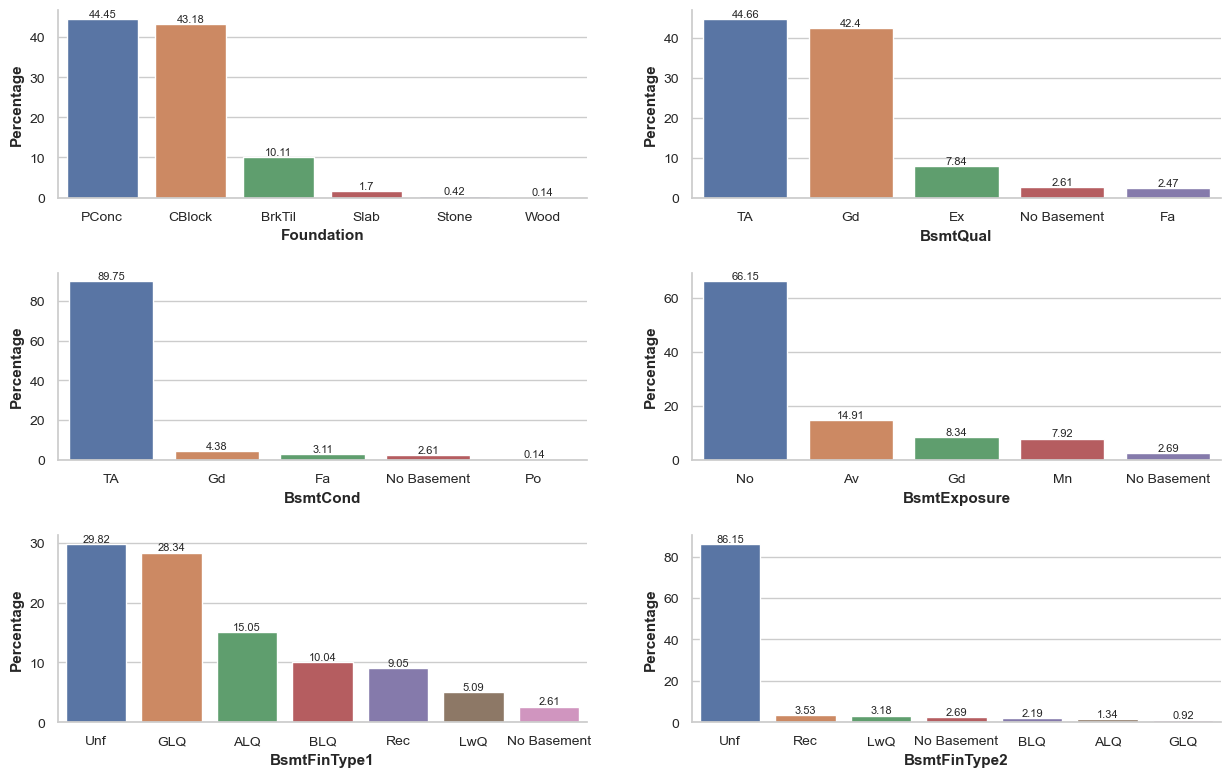

In [663]:
#Analyzing the distribution of Basment type
housing_df_cat = ['Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

plt.figure(figsize=(15, 8))
plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=0.4, wspace=0.2)
for i in enumerate(housing_df_cat):
    plt.subplot(3,2,i[0]+1)
    barplotresult = sns.barplot(data=housing_df, 
                                x=housing_df[i[1]].value_counts().index, 
                                y=housing_df[i[1]].value_counts(normalize=True).mul(100).round(2))
    plt.xlabel(i[1],fontweight='bold',fontsize=11)
    plt.ylabel('Percentage',fontweight='bold',fontsize=11)
    for i in barplotresult.containers:
        barplotresult.bar_label(i,fontsize=8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    gca = plt.gca()
    gca.spines['top'].set_visible(False)
    gca.spines['right'].set_visible(False)

plt.show()

In [664]:
#we could see majority of the houses are built with Cinder Block/Poured Contrete foundation
#Majority of the houses bought are the ones with average quality and condition on basement, and most of these has no walkout or garden level walls

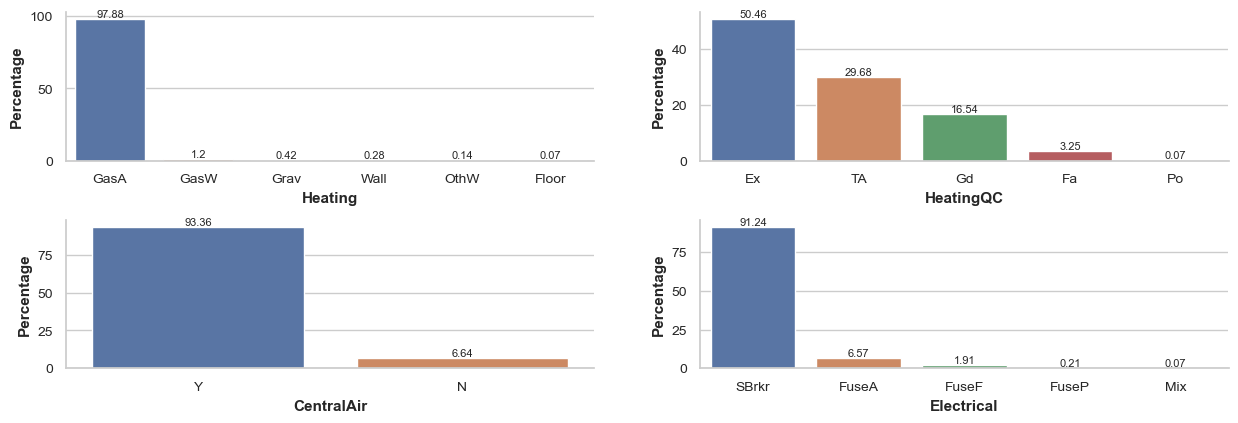

In [665]:
#Analyzing the distribution of Heating and AC in house
housing_df_cat = ['Heating','HeatingQC','CentralAir','Electrical']

plt.figure(figsize=(15, 4))
plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=0.4, wspace=0.2)
for i in enumerate(housing_df_cat):
    plt.subplot(2,2,i[0]+1)
    barplotresult = sns.barplot(data=housing_df, 
                                x=housing_df[i[1]].value_counts().index, 
                                y=housing_df[i[1]].value_counts(normalize=True).mul(100).round(2))
    plt.xlabel(i[1],fontweight='bold',fontsize=11)
    plt.ylabel('Percentage',fontweight='bold',fontsize=11)
    for i in barplotresult.containers:
        barplotresult.bar_label(i,fontsize=8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    gca = plt.gca()
    gca.spines['top'].set_visible(False)
    gca.spines['right'].set_visible(False)

plt.show()

In [666]:
#Heating seems to be a more prominent factor as we could see more than 97% of houses with Gas forced warm air furnace and majority of these falls above average rating
#More than 93% of houses have centralized AC.
#So, with this it's very clear that Heating and AC are two prominent factors.

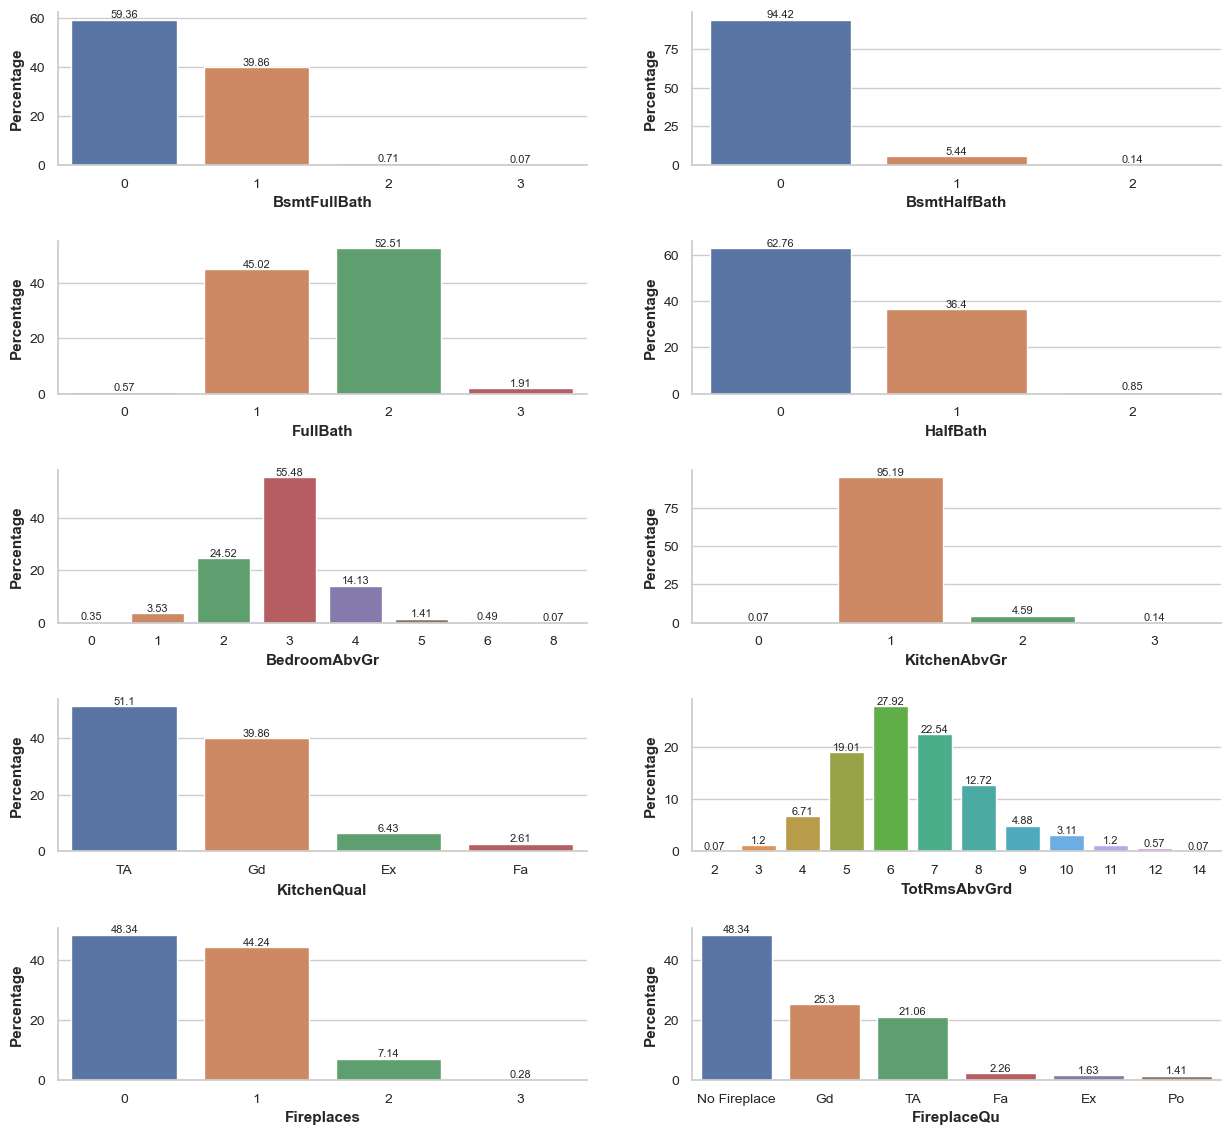

In [667]:
#Analyzing the distribution of Number of Rooms
housing_df_cat = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual',
                 'TotRmsAbvGrd','Fireplaces','FireplaceQu']

plt.figure(figsize=(15, 12))
plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=0.5, wspace=0.2)
for i in enumerate(housing_df_cat):
    plt.subplot(5,2,i[0]+1)
    barplotresult = sns.barplot(data=housing_df, 
                                x=housing_df[i[1]].value_counts().index, 
                                y=housing_df[i[1]].value_counts(normalize=True).mul(100).round(2))
    plt.xlabel(i[1],fontweight='bold',fontsize=11)
    plt.ylabel('Percentage',fontweight='bold',fontsize=11)
    for i in barplotresult.containers:
        barplotresult.bar_label(i,fontsize=8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    gca = plt.gca()
    gca.spines['top'].set_visible(False)
    gca.spines['right'].set_visible(False)

plt.show()

In [668]:
#Most of the houses are with 5 to 8 rooms above grade and with 1/2 bathrooms
#Though AC and heating played a prominent role, around 47% of houses has no fire places

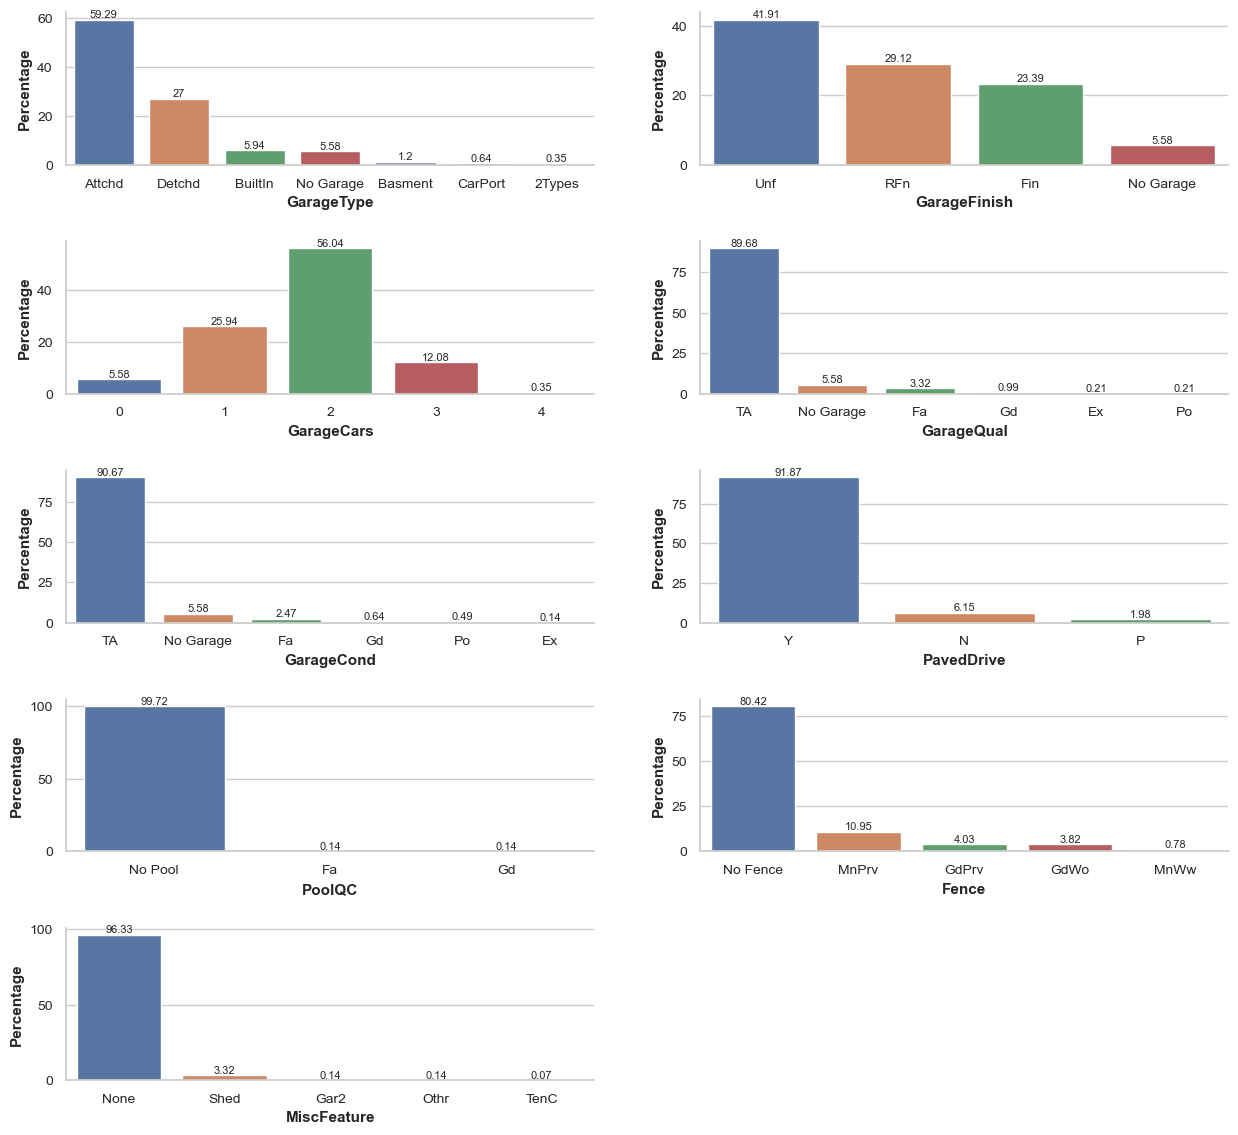

In [669]:
#Analyzing the distribution of Garage and pool parameters
housing_df_cat = ['GarageType','GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive',
                 'PoolQC','Fence','MiscFeature']

plt.figure(figsize=(15, 12))
plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=0.5, wspace=0.2)
for i in enumerate(housing_df_cat):
    plt.subplot(5,2,i[0]+1)
    barplotresult = sns.barplot(data=housing_df, 
                                x=housing_df[i[1]].value_counts().index, 
                                y=housing_df[i[1]].value_counts(normalize=True).mul(100).round(2))
    plt.xlabel(i[1],fontweight='bold',fontsize=11)
    plt.ylabel('Percentage',fontweight='bold',fontsize=11)
    for i in barplotresult.containers:
        barplotresult.bar_label(i,fontsize=8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    gca = plt.gca()
    gca.spines['top'].set_visible(False)
    gca.spines['right'].set_visible(False)

plt.show()

In [670]:
#Most of the houses are with attached garage able to accomodate 2 cars with paved drive
#About 99% of houses does not have pool
#Around 80% of houses does not have fence

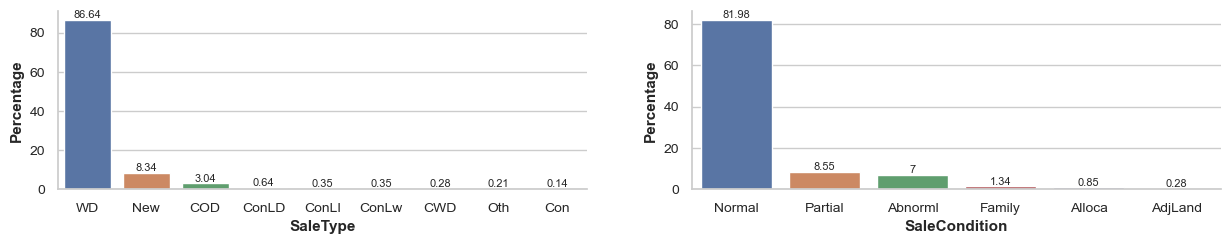

In [671]:
#Analyzing the distribution of Sale parameters
housing_df_cat = ['SaleType','SaleCondition']

plt.figure(figsize=(15, 2))
plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=0.4, wspace=0.2)
for i in enumerate(housing_df_cat):
    plt.subplot(1,2,i[0]+1)
    barplotresult = sns.barplot(data=housing_df, 
                                x=housing_df[i[1]].value_counts().index, 
                                y=housing_df[i[1]].value_counts(normalize=True).mul(100).round(2))
    plt.xlabel(i[1],fontweight='bold',fontsize=11)
    plt.ylabel('Percentage',fontweight='bold',fontsize=11)
    for i in barplotresult.containers:
        barplotresult.bar_label(i,fontsize=8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    gca = plt.gca()
    gca.spines['top'].set_visible(False)
    gca.spines['right'].set_visible(False)

plt.show()

In [672]:
#More than 80% of the houses sold are with sale type of Warranty Deed - Conventional

In [673]:
#Analyzing Distribution of Continuous variables

In [674]:
housing_df_num = housing_df.select_dtypes(include=['int64', 'float64'])
housing_df_num.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'Remodeled', 'House_age_at_sale',
       'Remodeled_House_age_at_sale'],
      dtype='object')

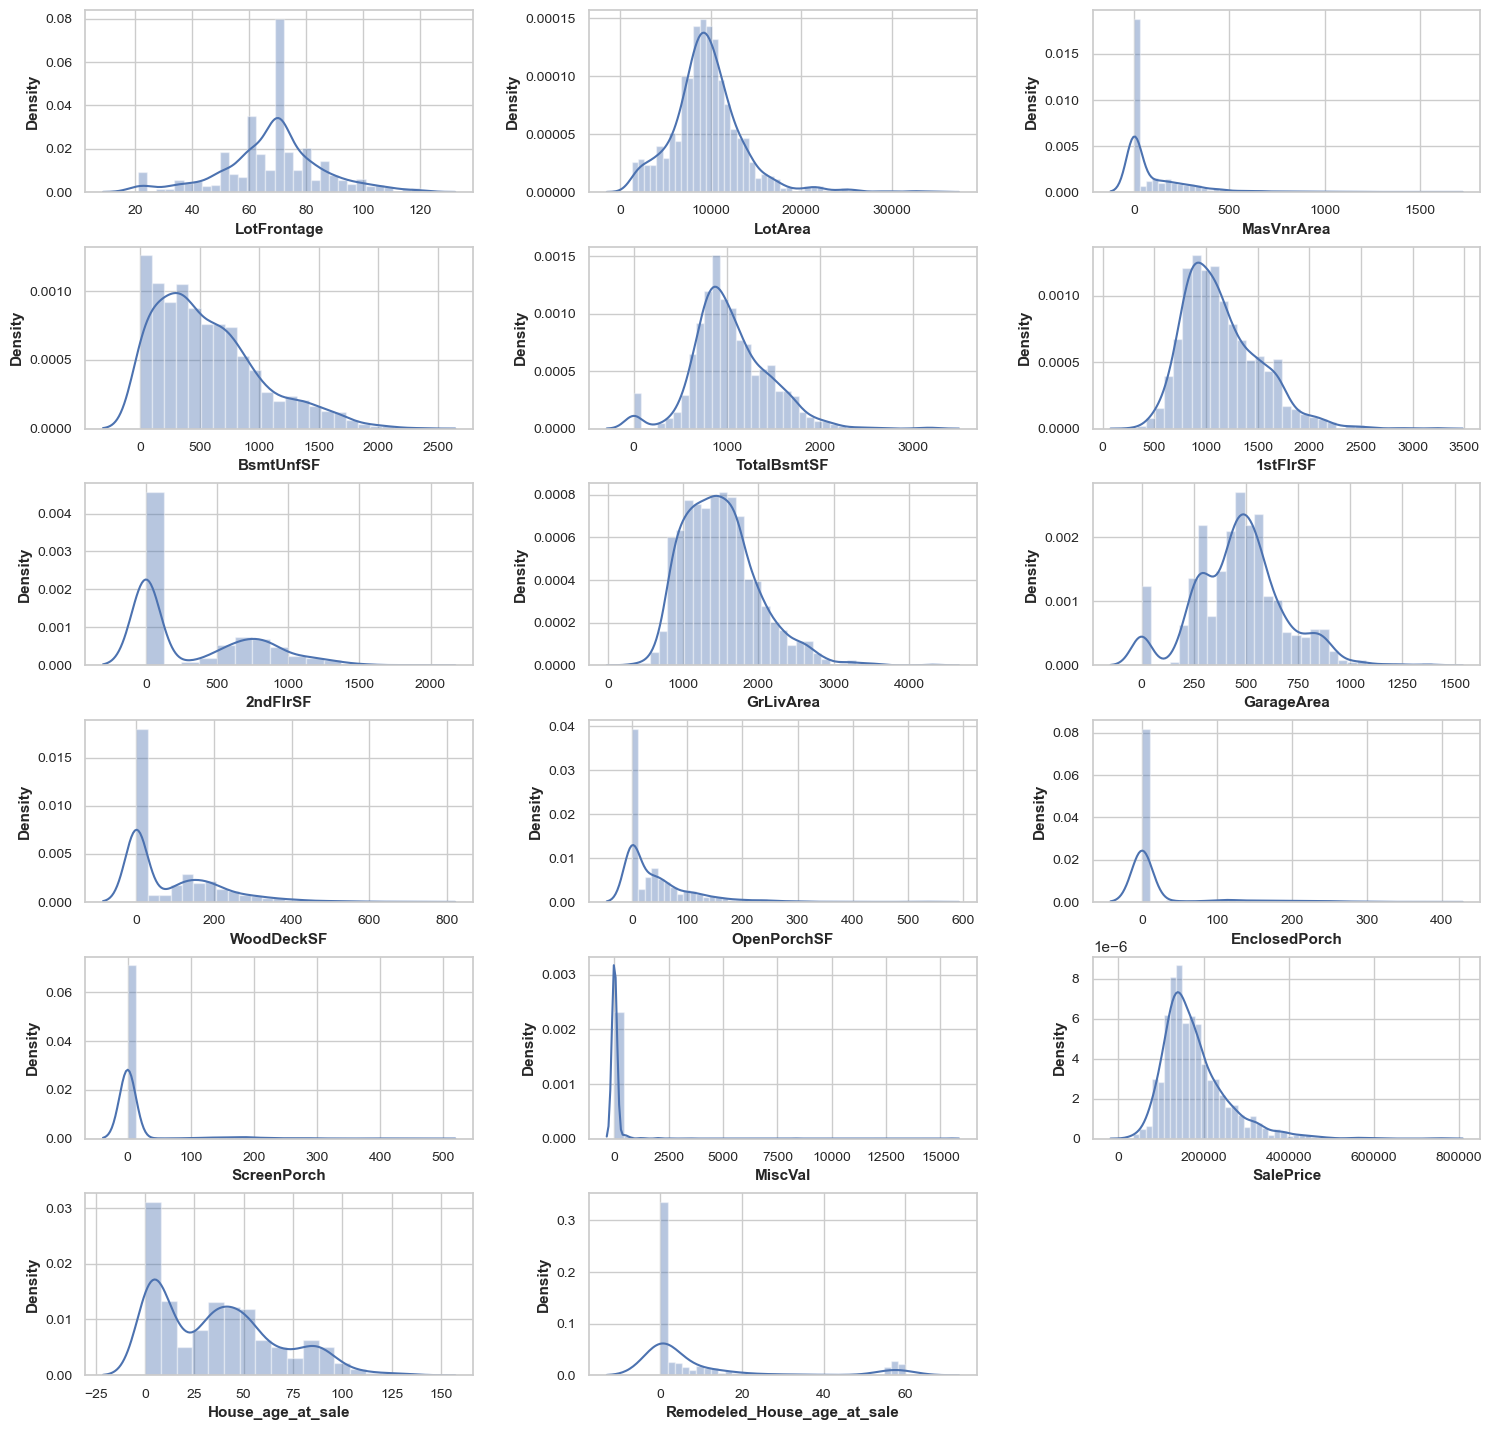

In [675]:
#Analyzing Distribution of Continuous variables
housing_df_num=['LotFrontage', 'LotArea', 'MasVnrArea', 
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch',  'MiscVal',
       'SalePrice',  'House_age_at_sale',
       'Remodeled_House_age_at_sale']

plt.figure(figsize=(18, 18))
plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=0.3, wspace=0.3)
for i in enumerate(housing_df_num):
    plt.subplot(7,3,i[0]+1)
    sns.distplot(housing_df[i[1]])
    plt.xlabel(i[1],fontweight='bold',fontsize=11)
    plt.ylabel('Density',fontweight='bold',fontsize=11)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
plt.show()

> <font color='#006400' size=4.8><span style="text-decoration:underline">***Observations:***</span></br></font>
> </br>
> <font size=3.5> - Most of the houses sold were "1-1/2 STORY FINISHED ALL AGES" and with "2-STORY 1946 & NEWER", when compared to other categories </font>
> </br> 
> <font size=3.5> - Majority of the houses (around 78%) is with the zone category of "Residential Low Density"</font>
> </br> 
> <font size=3.5> - More than 90% of the houses have paved access to the property but with no alley access</font>
> </br> 
> <font size=3.5> - Majority of the houses sold were the ones which are Regular in shape and nearly flat and gentle slope without major elevation from ground level</font>
> </br> 
> <font size=3.5> - More than 80% of the houses are for the dwelling of Single-family Detached as expected. So naturally people would prefer 1 story buldings than larger ones. </font>
> </br> 
> <font size=3.5> - Most of the houses sold were with average and above average ratings and also with average quality.</font>
> </br> 
> <font size=3.5> - More than 75% of the houses are with Gable roofs made up of Standard (Composite) Shingle </font>
> </br> 
> <font size=3.5> - We could see majority of the houses are built with Cinder Block/Poured Contrete foundation </font>
> </br> 
> <font size=3.5> - Majority of the houses bought are the ones with average quality and condition on basement, and most of these has no walkout or garden level walls </font>
> </br> 
> <font size=3.5> - Heating seems to be a more prominent factor as we could see more than 97% of houses with Gas forced warm air furnace and majority of these falls above average rating </font>
> </br> 
> <font size=3.5> - More than 93% of houses have centralized AC. So, with this it's very clear that Heating and AC are two prominent factors. </font>
> </br> 
> <font size=3.5> - Most of the houses are with 5 to 8 rooms above grade and with 1/2 bathrooms </font>
> </br> 
> <font size=3.5> - Though AC and heating played a prominent role, around 47% of houses has no fire places </font>
> </br> 
> <font size=3.5> - Most of the houses are with attached garage able to accomodate 2 cars with paved drive </font>
> </br>
> <font size=3.5> - About 99% of houses does not have pool </font>
> </br>
> <font size=3.5> - Around 80% of houses does not have fence </font>
> </br>
> <font size=3.5> - More than 80% of the houses sold are with sale type of Warranty Deed - Conventional </font>
> </br>

#### <font color='black' size=3.2>1.4 Bivariate Analysis</font>

In [676]:
#Analyzing independent variables against the target variable

In [677]:
#Analyzing numeric variables

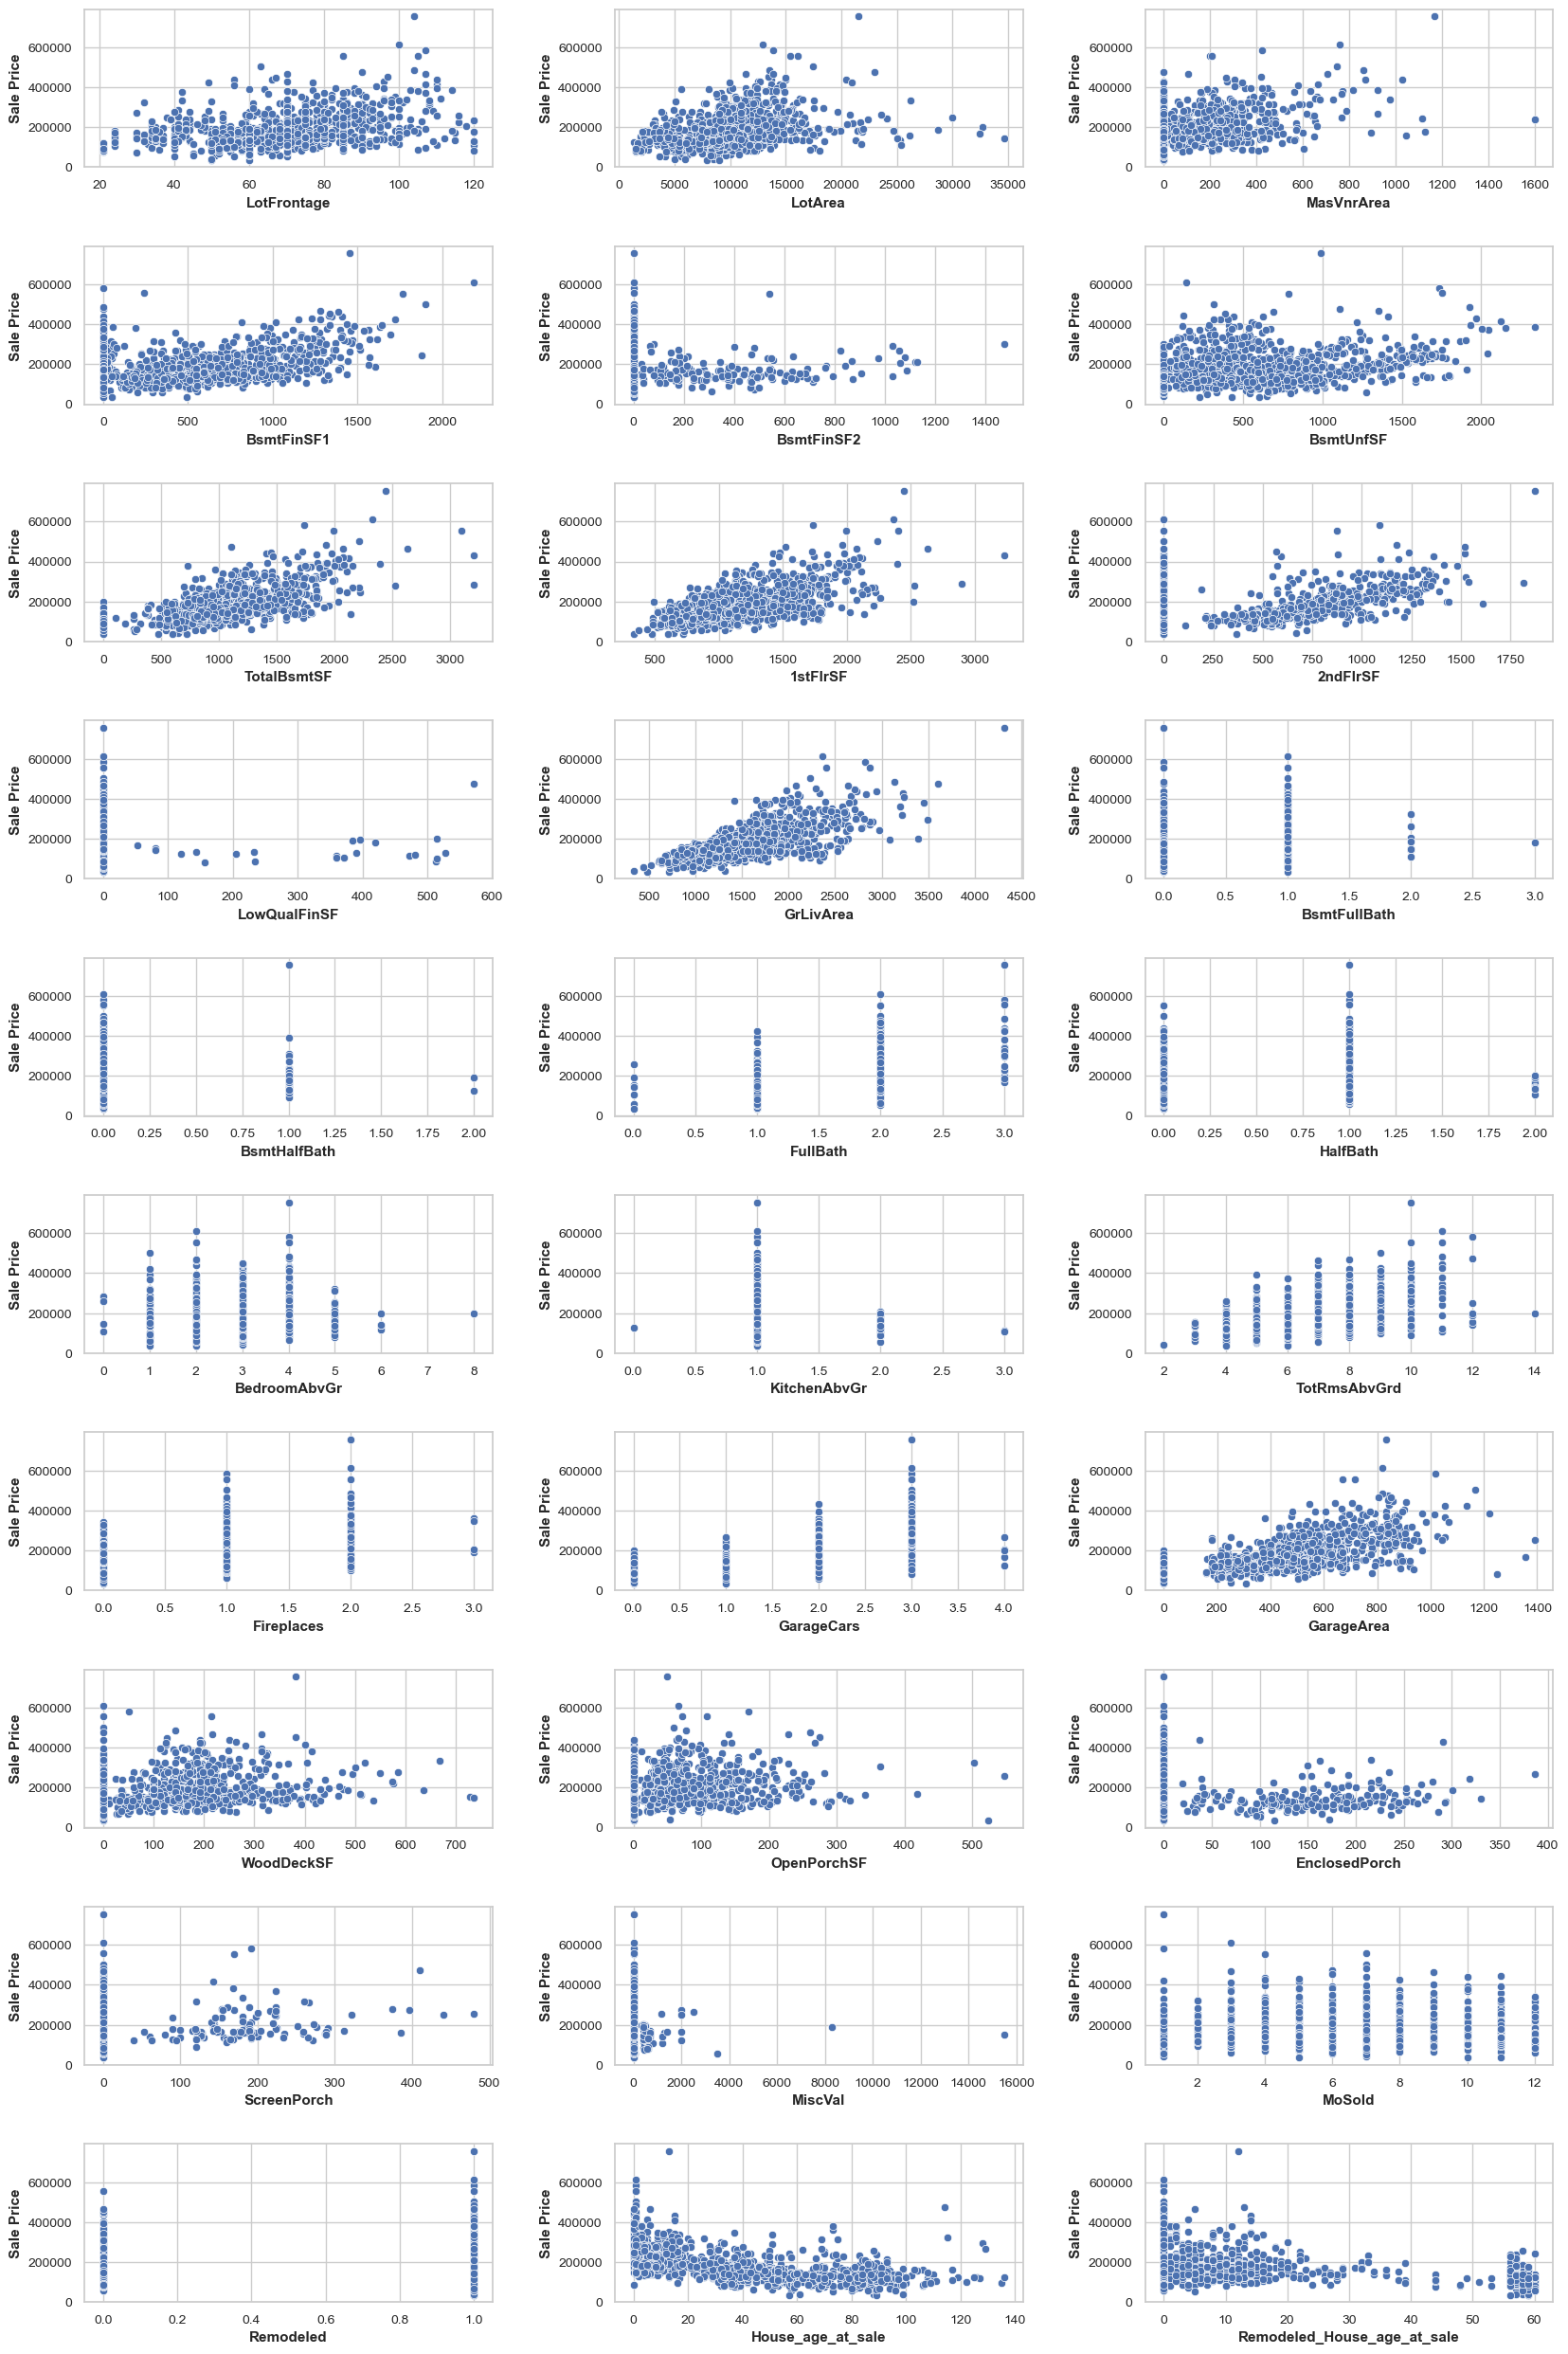

In [678]:
housing_df_num=['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch',  'ScreenPorch', 'MiscVal',
       'MoSold', 'Remodeled', 'House_age_at_sale',
       'Remodeled_House_age_at_sale']

plt.figure(figsize=(20, 30))
plt.subplots_adjust(top = 0.90, bottom=0.01, hspace=0.5, wspace=0.3)
for i in enumerate(housing_df_num):
    plt.subplot(11,3,i[0]+1)
    sns.scatterplot(data=housing_df, x=i[1],y='SalePrice')
    plt.xlabel(i[1],fontweight='bold',fontsize=11)
    plt.ylabel('Sale Price',fontweight='bold',fontsize=11)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
plt.show()


In [679]:
#We could see many of these variable are not having linear distribution w.r.t to the target variable - Sale Price
#We can clearly see that as the age of the house goes high, sale price comes down

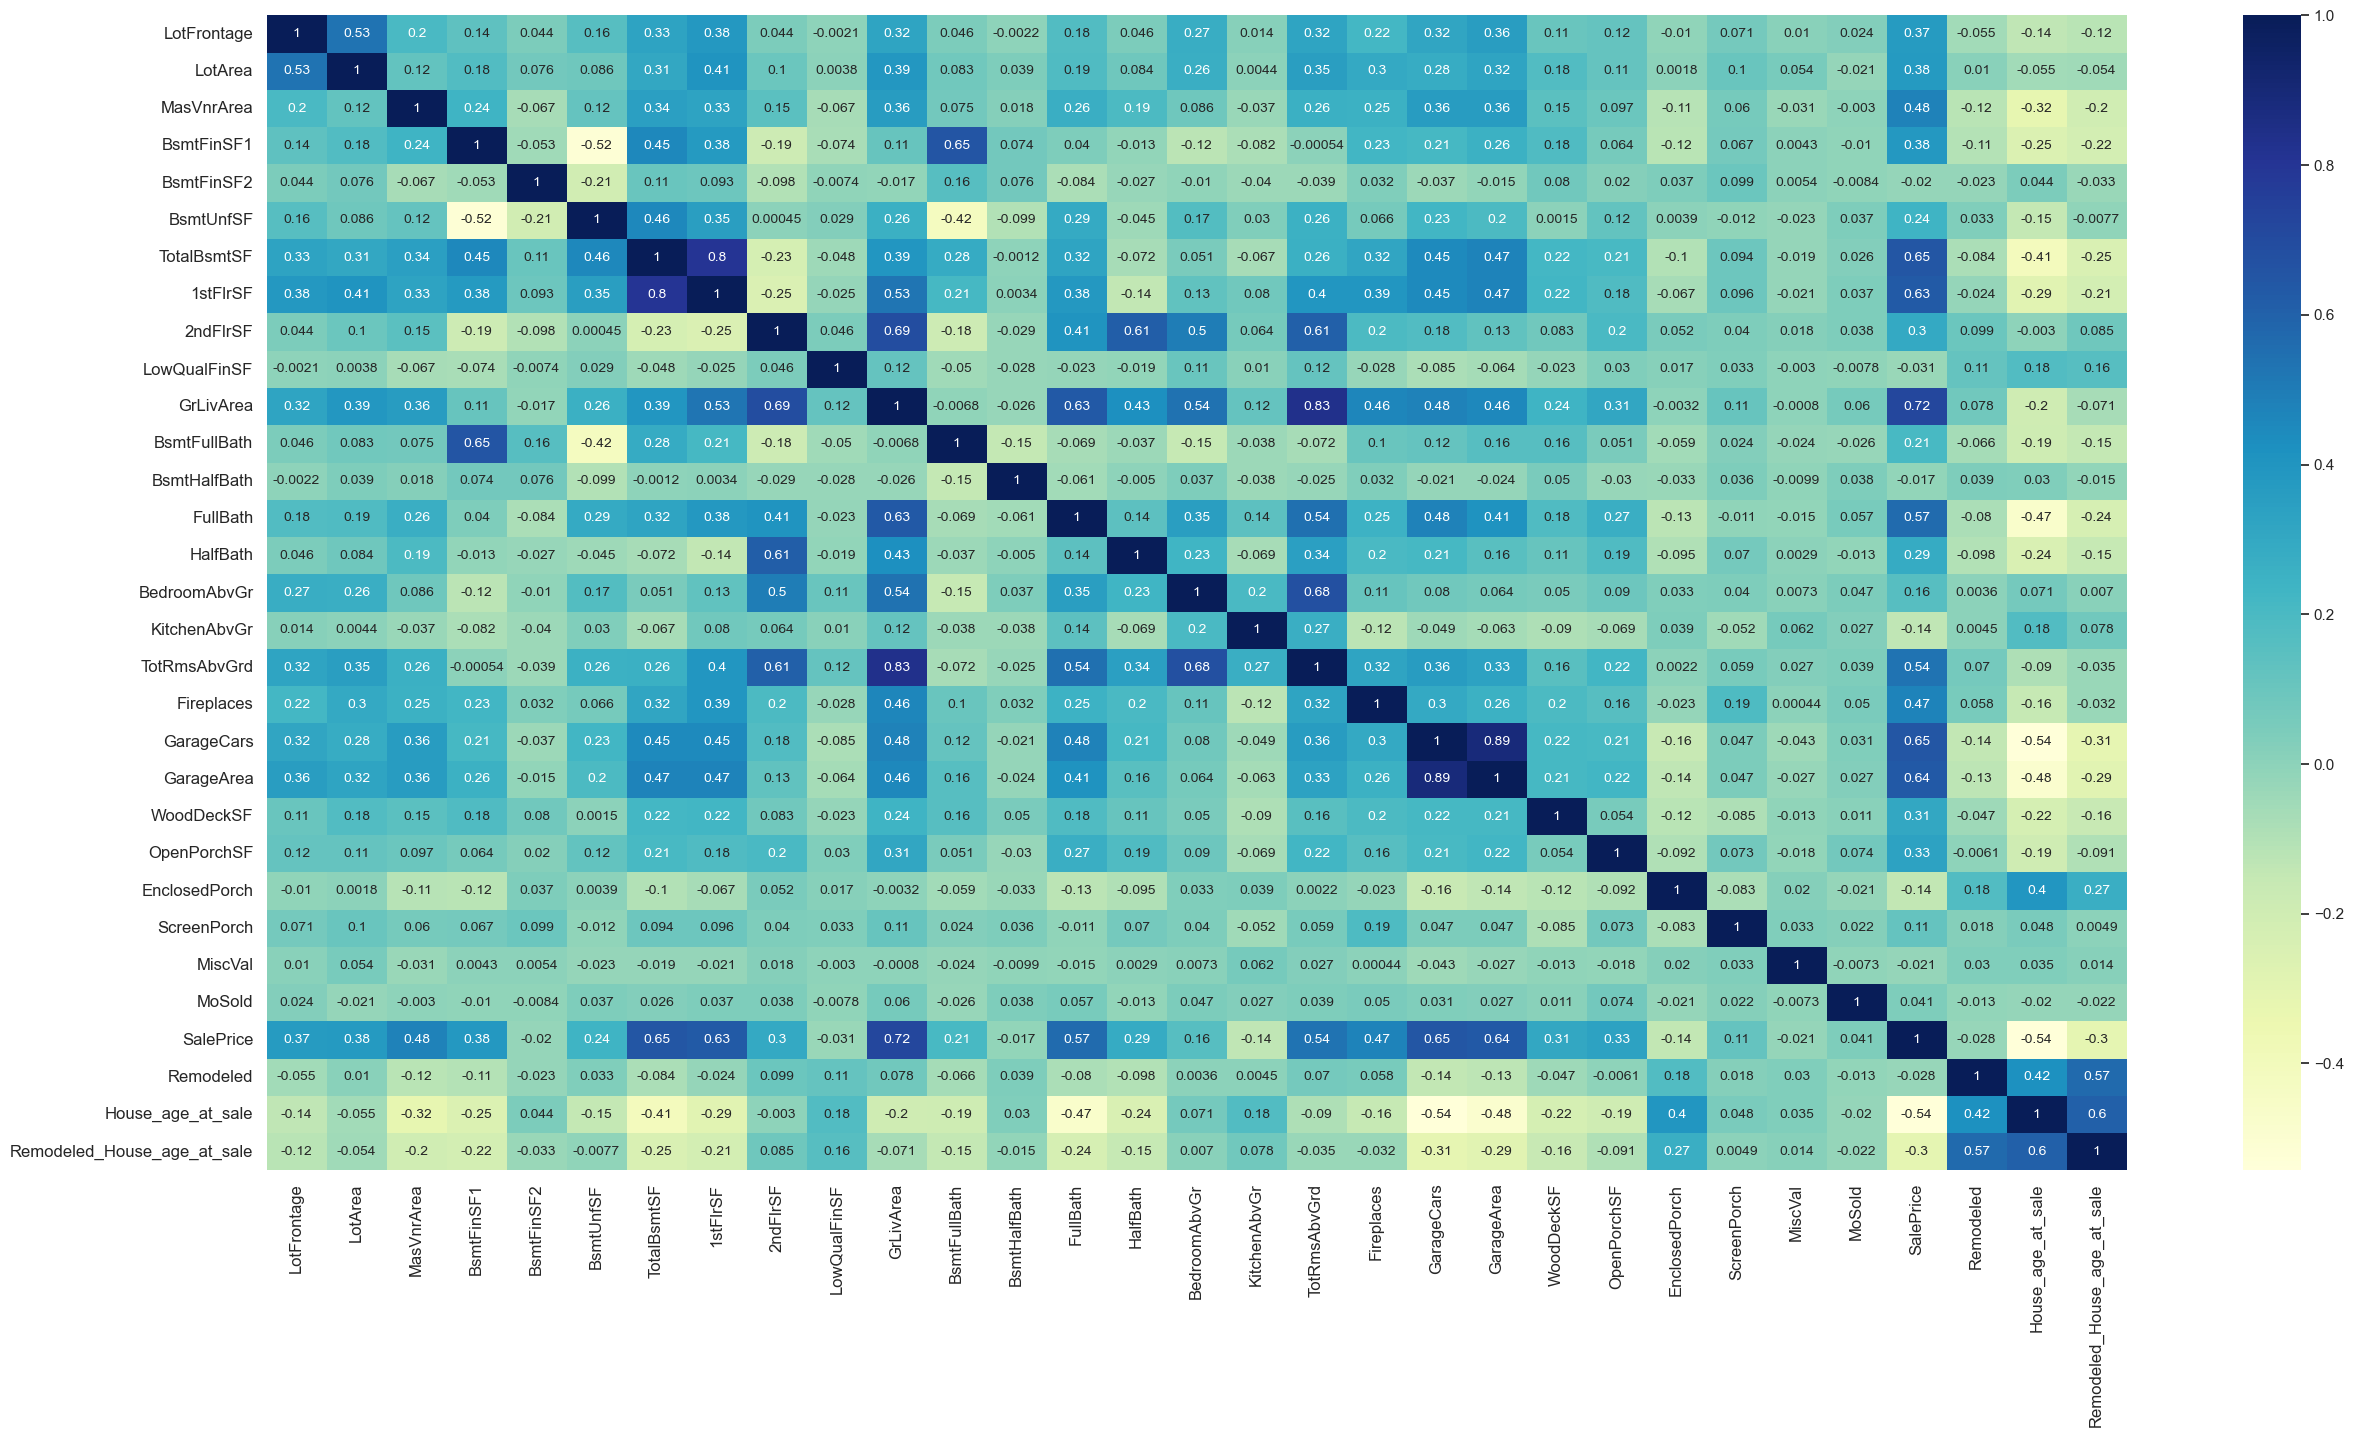

In [680]:
#Analyzing Multicollinearity between the numeric variables
corrdf = housing_df[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'SalePrice', 'Remodeled', 'House_age_at_sale',
       'Remodeled_House_age_at_sale']]
plt.figure(figsize=(30,15))
g= sns.heatmap(corrdf.corr(),annot=True,cmap="YlGnBu",annot_kws={'size': 10})
g.tick_params(labelsize=12)
plt.show()

In [681]:
#We can see few of the parameters are highly correlated leading to Multicollinearity

#### <font color='#000080' size=5>***2. Data Preparation:***</font>

#### <font color='black' size=3.2>2.1 Creating Dummy variables</font>

In [682]:
#Get the list of categorical variables
cat_variables = housing_df.select_dtypes(include=['object'])
cat_variables.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [683]:
dummy_cols = pd.get_dummies(cat_variables, drop_first=True,dtype='int')
dummy_cols.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [684]:
# Droping the original categorical column
housing_df = housing_df.drop(list(cat_variables.columns), axis=1)
housing_df.shape

(1415, 33)

In [685]:
# Adding the dummy categorical column to original dataset
housing_df = pd.concat([housing_df,dummy_cols], axis=1)
housing_df.shape

(1415, 283)

#### <font color='black' size=3.2>2.2 Transforming Target Variable </font>

In [686]:
import scipy.stats as stats
from scipy.stats import norm

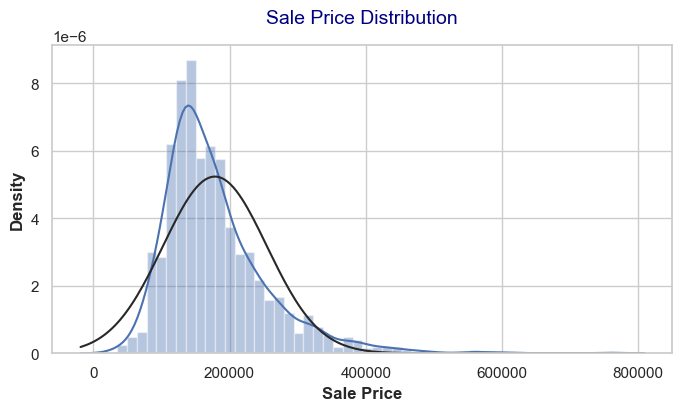

In [687]:
#Analysis on the Target variable - Sale Price
plt.figure(figsize=(8, 4))
sns.distplot(housing_df['SalePrice'], fit=norm)
plt.xlabel("Sale Price",fontweight='bold',fontsize=12)
plt.ylabel("Density",fontweight='bold',fontsize=12)
plt.title('Sale Price Distribution',pad=16, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
plt.show()


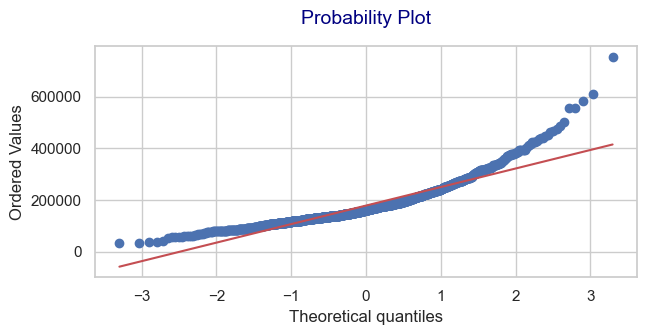

In [688]:
#Plotting the QQ-plot
plt.figure(figsize=(7, 3))
res = stats.probplot(housing_df['SalePrice'], plot=plt)
plt.title('Probability Plot',pad=16, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
plt.show()

In [689]:
#The target variable is right skewed.We need to transform this variable and make it normally distributed ,
#so using log tranformation method

housing_df["SalePrice"] = np.log(housing_df["SalePrice"])

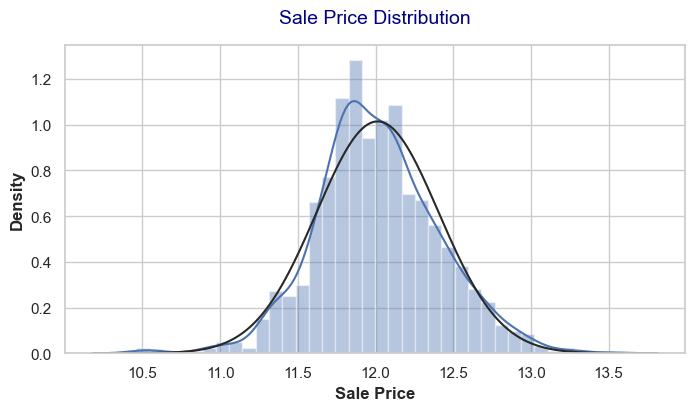

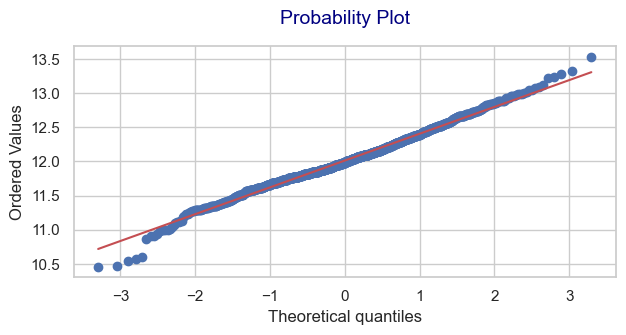

In [690]:
#Checking the distribution now
plt.figure(figsize=(8, 4))
sns.distplot(housing_df['SalePrice'], fit=norm)
plt.xlabel("Sale Price",fontweight='bold',fontsize=12)
plt.ylabel("Density",fontweight='bold',fontsize=12)
plt.title('Sale Price Distribution',pad=16, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
plt.show()

#Plotting the QQ-plot
plt.figure(figsize=(7, 3))
res = stats.probplot(housing_df['SalePrice'], plot=plt)
plt.title('Probability Plot',pad=16, fontdict={"fontsize":14, "fontweight":5,"color":"#000080"})
plt.show()

#### <font color='black' size=3.2>2.3 Split data into Train and test set</font>

In [691]:
X = housing_df.drop(["SalePrice"], axis=1).copy()
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Remodeled,House_age_at_sale,Remodeled_House_age_at_sale,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,0.0,5,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,0.0,31,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,1.0,7,6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,1.0,91,36,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,0.0,8,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [692]:
y = housing_df["SalePrice"].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [693]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [694]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(990, 282)
(990,)
(425, 282)
(425,)


#### <font color='black' size=3.2>2.4 Scaling </font>

In [695]:
# Scaling numerical columns
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Remodeled',
 'House_age_at_sale',
 'Remodeled_House_age_at_sale']

In [696]:
## Create a scaling instance
scaler = MinMaxScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Remodeled,House_age_at_sale,Remodeled_House_age_at_sale,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.478909,0.250295,0.062629,0.199601,0.028246,0.238771,0.323790,0.283187,0.187500,0.012789,0.295796,0.211616,0.028283,0.523232,0.191414,0.355934,0.025253,0.376515,0.199663,0.442172,0.348568,0.128627,0.083888,0.067043,0.007033,0.031799,0.002607,0.003259,0.489624,0.477778,0.269392,0.170640,0.045455,0.003030,0.010101,0.089899,0.204040,0.044444,0.014141,0.039394,0.016162,0.036364,...,0.059596,0.005051,0.271717,0.059596,0.059596,0.286869,0.410101,0.029293,0.010101,0.059596,0.001010,0.896970,0.025253,0.005051,0.059596,0.003030,0.905051,0.016162,0.929293,0.001010,0.996970,0.038384,0.101010,0.007071,0.812121,0.960606,0.002020,0.034343,0.001010,0.002020,0.001010,0.008081,0.004040,0.004040,0.085859,0.002020,0.859596,0.002020,0.008081,0.014141,0.815152,0.087879
std,0.177266,0.121269,0.109376,0.196585,0.105992,0.186981,0.127318,0.126506,0.233196,0.094452,0.126571,0.257185,0.117731,0.183798,0.255331,0.102266,0.111831,0.136748,0.212464,0.187789,0.158349,0.166398,0.121175,0.184322,0.059689,0.118271,0.047790,0.037906,0.245910,0.499758,0.224780,0.310833,0.208404,0.054992,0.100045,0.286182,0.403202,0.206185,0.118134,0.194629,0.126161,0.187288,...,0.236856,0.070923,0.445070,0.236856,0.236856,0.452528,0.492100,0.168712,0.100045,0.236856,0.031782,0.304152,0.156970,0.070923,0.236856,0.054992,0.293293,0.126161,0.256464,0.031782,0.054992,0.192218,0.301494,0.083832,0.390813,0.194629,0.044924,0.182202,0.031782,0.044924,0.031782,0.089575,0.063468,0.063468,0.280297,0.044924,0.347581,0.044924,0.089575,0.118134,0.388371,0.283262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

#### <font color='#000080' size=5>***3. Ridge Regression Model***</font>

#### <font color='black' size=3.2>3.1 Finding Optimal value of Hyperparameter  </font>

In [697]:
## Run cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
ridge = Ridge()
ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [698]:
# cv results
ridge_cv_results = pd.DataFrame(ridgeCV.cv_results_)
cv_results = ridge_cv_results[['param_alpha','mean_train_score','mean_test_score']]
cv_results

,param_alpha,mean_train_score,mean_test_score
0,0.0001,-0.056216,-0.103434
1,0.001,-0.056249,-0.102697
2,0.01,-0.056534,-0.099935
3,0.05,-0.057284,-0.096848
4,0.1,-0.057868,-0.095189
5,0.2,-0.058713,-0.093578
6,0.3,-0.059351,-0.092477
7,0.4,-0.059883,-0.091625
8,0.5,-0.060335,-0.090948
9,0.6,-0.060726,-0.090373


In [699]:
## View the optimal value of alpha
ridgeCV.best_params_

{'alpha': 4.0}

In [700]:
#Fine tuning on alpha value
params = {'alpha': [3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5]}
ridge = Ridge()
ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
ridgeCV.fit(X_train, y_train) 
ridgeCV.best_params_

Fitting 5 folds for each of 11 candidates, totalling 55 fits


{'alpha': 3.9}

In [701]:
# cv results
ridge_cv_results = pd.DataFrame(ridgeCV.cv_results_)
cv_results = ridge_cv_results[['param_alpha','mean_train_score','mean_test_score']]
cv_results

,param_alpha,mean_train_score,mean_test_score
0,3.5,-0.066303,-0.086460
1,3.6,-0.066431,-0.086446
2,3.7,-0.066558,-0.086436
3,3.8,-0.066684,-0.086428
4,3.9,-0.066807,-0.086424
5,4.0,-0.066931,-0.086424
6,4.1,-0.067052,-0.086426
7,4.2,-0.067172,-0.086429
8,4.3,-0.067290,-0.086433
9,4.4,-0.067407,-0.086437


#### <font color='black' size=3.2>3.2 Model Building and Evaluation</font>

In [702]:
## Now Build Ridge Regression Model using alpha
ridge = Ridge(alpha=3.9)
ridge.fit(X_train, y_train)

Ridge(alpha=3.9)

In [703]:
## Make Predictions on Train and Test Data

In [704]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [705]:
## Check metrics
def get_metrics(y_train, y_train_pred, y_test, y_pred):
    # Create a list to save all metrics
    metric = []
    
    # R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    # Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    
     # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    
    return metric

In [706]:
print("Ridge Regression")
print("--------------------")
print("No. of Features =", len(ridge.coef_))
ridge_metrics = get_metrics(y_train, y_train_pred, y_test, y_pred)

Ridge Regression
--------------------
No. of Features = 282
R-Squared (Train) = 0.94
R-Squared (Test) = 0.92
RSS (Train) = 9.12
RSS (Test) = 5.42
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.11


In [707]:
#Coefficients of Ridge Regression - For Top 10 features
#To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_parameter = list(np.exp(ridge.coef_))
#ridge_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,ridge_parameter,(abs(ele) for ele in ridge_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

In [708]:
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
7,1stFlrSF,1.292028,1.292028
10,GrLivArea,1.290335,1.290335
6,TotalBsmtSF,1.196758,1.196758
8,2ndFlrSF,1.149072,1.149072
3,BsmtFinSF1,1.147309,1.147309
13,FullBath,1.133836,1.133836
17,TotRmsAbvGrd,1.131343,1.131343
1,LotArea,1.127362,1.127362
123,OverallQual_9,1.126704,1.126704
124,OverallQual_10,1.114128,1.114128


In [709]:
## Above metrics seems to be Good. However, validate the assumptions of Linear regression to confirm the Model

#### <font color='black' size=3.2>3.3 Residual Analysis</font>

In [710]:
res = y_train - y_train_pred

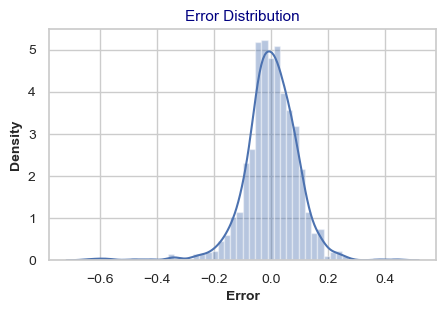

In [711]:
plt.figure(figsize=(5,3))
fig = sns.distplot(res)
plt.xlabel("Error",fontweight='bold',fontsize=10)
plt.ylabel('Density',fontweight='bold',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Error Distribution',fontdict={"fontsize":11, "color":"#000080"})
plt.show()

In [712]:
#Homoscedasticity & Linearity

In [713]:
#Homoscedasticity: The variance of residuals should be constant across all levels of the independent variables, 
#indicating consistent levels of variability.

##Linearity - points should fall approximately along the reference line indicating linear relationship

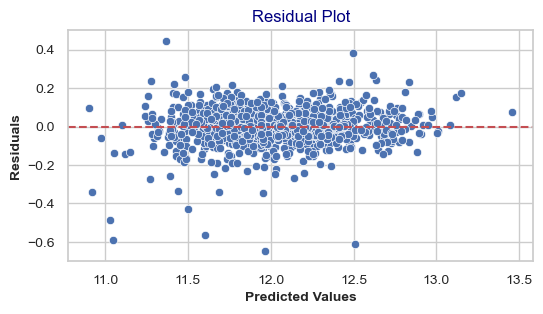

In [714]:
plt.figure(figsize=(6,3))
sns.scatterplot(x = y_train_pred, y = res)
plt.xlabel('Predicted Values',fontweight='bold',fontsize=10)
plt.ylabel('Residuals',fontweight='bold',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Residual Plot',fontdict={"fontsize":12, "color":"#000080"})
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

In [715]:
#Visualize the trained model with a linear regression fit line 

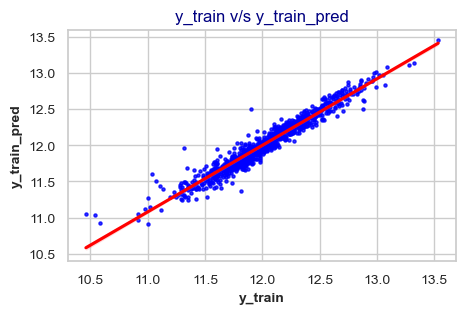

In [716]:
# Visualize the trained model using a scatter plot with a linear regression fit line
plt.figure(figsize=(5,3))
sns.regplot(x = y_train, y = y_train_pred, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 5, 'color': 'blue' })

# Show the plot
plt.title('y_train v/s y_train_pred',fontdict={"fontsize":12, "color":"#000080"})
plt.xlabel('y_train',fontweight='bold',fontsize=10)
plt.ylabel('y_train_pred',fontweight='bold',fontsize=10) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

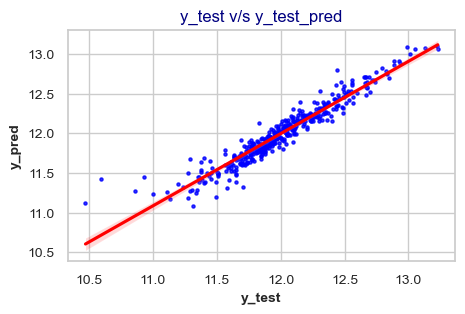

In [717]:
# Visualize the model on Test data using a scatter plot with a linear regression fit line
plt.figure(figsize=(5,3))
sns.regplot(x = y_test, y = y_pred, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 5, 'color': 'blue' })

# Show the plot
plt.title('y_test v/s y_test_pred',fontdict={"fontsize":12, "color":"#000080"})
plt.xlabel('y_test',fontweight='bold',fontsize=10)
plt.ylabel('y_pred',fontweight='bold',fontsize=10) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [718]:
# All the Assumptions of Linear Model is met

#### <font color='#000080' size=5>***4. Lasso Regression Model***</font>

#### <font color='black' size=3.2>4.1 Finding Optimal value of Hyperparameter  </font>

In [719]:
## Run cross validation on a list of alphas to find the optimum value of alpha
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
lasso = Lasso()
lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [720]:
# cv results
lasso_cv_results = pd.DataFrame(lassoCV.cv_results_)
cv_results = lasso_cv_results[['param_alpha','mean_train_score','mean_test_score']]
cv_results

,param_alpha,mean_train_score,mean_test_score
0,0.0001,-0.061616,-0.087660
1,0.001,-0.074845,-0.085401
2,0.01,-0.131434,-0.136877
3,0.05,-0.217453,-0.219363
4,0.1,-0.289910,-0.290267
5,0.2,-0.307772,-0.307803
6,0.3,-0.307772,-0.307803
7,0.4,-0.307772,-0.307803
8,0.5,-0.307772,-0.307803
9,0.6,-0.307772,-0.307803


In [721]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

#### <font color='black' size=3.2>4.2 Model Building and Evaluation  </font>

In [722]:
## Now Build Lasso Regression Model using alpha
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [723]:
## Make Predictions on Train and Test Data

In [724]:
y_train_pred_l = lasso.predict(X_train)
y_pred_l = lasso.predict(X_test)

In [725]:
## Check metrics
def get_metrics_lasso(y_train, y_train_pred, y_test, y_pred):
    # Create a list to save all metrics
    metric = []
    
    # R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    # Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    
     # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    
    return metric

In [726]:
#Number of coefficients selected by lasso
coeff_selected = np.count_nonzero(lasso.coef_)
coeff_selected

94

In [727]:
print("Lasso Regression")
print("--------------------")
print("No. of Features =", coeff_selected)
lasso_metrics = get_metrics_lasso(y_train, y_train_pred_l, y_test, y_pred_l)

Lasso Regression
--------------------
No. of Features = 94
R-Squared (Train) = 0.92
R-Squared (Test) = 0.92
RSS (Train) = 11.54
RSS (Test) = 5.29
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.11


In [728]:
#Coefficients of Lasso Regression - For Top 10 features
#To interpret the Lasso coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
lasso_parameter = list(np.exp(lasso.coef_))
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,lasso_parameter,(abs(ele) for ele in lasso_parameter))))
lasso_coef.columns = ['Features','Coefficient','Mod']
lasso_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
10,GrLivArea,2.817724,2.817724
6,TotalBsmtSF,1.357090,1.357090
123,OverallQual_9,1.184323,1.184323
124,OverallQual_10,1.182522,1.182522
274,SaleType_New,1.137824,1.137824
71,Neighborhood_Crawfor,1.119096,1.119096
19,GarageCars,1.111861,1.111861
3,BsmtFinSF1,1.111739,1.111739
122,OverallQual_8,1.104941,1.104941
20,GarageArea,1.095675,1.095675


In [729]:
## Above metrics seems to be Good. However, validate the assumptions of Linear regression to confirm the Model

#### <font color='black' size=3.2>4.3 Residual Analysis</font>

In [730]:
res_l = y_train - y_train_pred_l

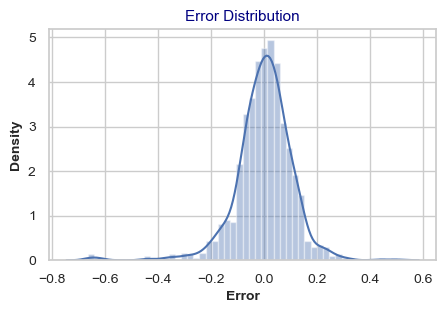

In [731]:
plt.figure(figsize=(5,3))
fig = sns.distplot(res_l)
plt.xlabel("Error",fontweight='bold',fontsize=10)
plt.ylabel('Density',fontweight='bold',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Error Distribution',fontdict={"fontsize":11, "color":"#000080"})
plt.show()

In [732]:
#Homoscedasticity & Linearity
#Homoscedasticity: The variance of residuals should be constant across all levels of the independent variables, 
#indicating consistent levels of variability.

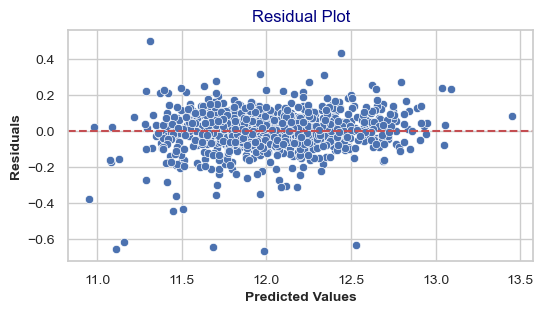

In [733]:
##Linearity - points should fall approximately along the reference line indicating linear relationship
plt.figure(figsize=(6,3))
sns.scatterplot(x = y_train_pred_l, y = res_l)
plt.xlabel('Predicted Values',fontweight='bold',fontsize=10)
plt.ylabel('Residuals',fontweight='bold',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Residual Plot',fontdict={"fontsize":12, "color":"#000080"})
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

In [734]:
#Visualize the trained model with a linear regression fit line 

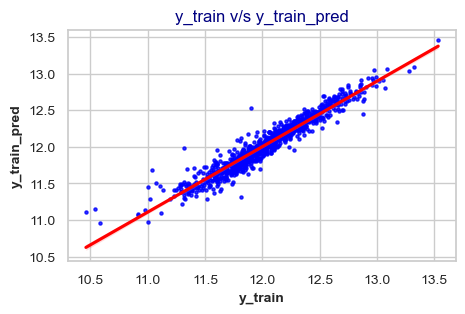

In [735]:
# Visualize the trained model using a scatter plot with a linear regression fit line
plt.figure(figsize=(5,3))
sns.regplot(x = y_train, y = y_train_pred_l, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 5, 'color': 'blue' })

# Show the plot
plt.title('y_train v/s y_train_pred',fontdict={"fontsize":12, "color":"#000080"})
plt.xlabel('y_train',fontweight='bold',fontsize=10)
plt.ylabel('y_train_pred',fontweight='bold',fontsize=10) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

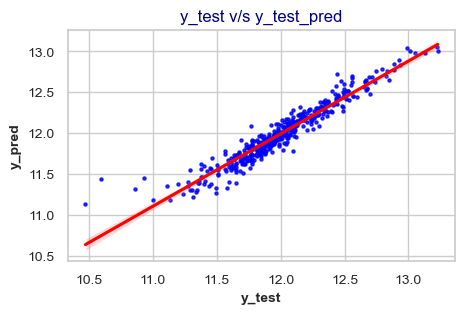

In [736]:
# Visualize the model on Test data using a scatter plot with a linear regression fit line
plt.figure(figsize=(5,3))
sns.regplot(x = y_test, y = y_pred_l, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 5, 'color': 'blue' })

# Show the plot
plt.title('y_test v/s y_test_pred',fontdict={"fontsize":12, "color":"#000080"})
plt.xlabel('y_test',fontweight='bold',fontsize=10)
plt.ylabel('y_pred',fontweight='bold',fontsize=10) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [737]:
# All the Assumptions of Linear Model is met

#### <font color='#000080' size=5>***5. Comparison of Ridge and Lasso Regression Model***</font>

In [738]:
# Create a table that contain all the metrics

lr_table = {'Metric': ['R-Squared (Train)','R-Squared (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)', 
                       'No. of features']
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

ridge_metrics.append(len(ridge.coef_))
lasso_metrics.append(coeff_selected)

rg_metric = pd.Series(ridge_metrics, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metrics, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R-Squared (Train),0.940374,0.924489
1,R-Squared (Test),0.917801,0.919767
2,RSS (Train),9.115041,11.543362
3,RSS (Test),5.424146,5.294461
4,MSE (Train),0.009207,0.011660
5,MSE (Test),0.012763,0.012458
6,RMSE (Train),0.095954,0.107981
7,RMSE (Test),0.112972,0.111613
8,No. of features,282.000000,94.000000


In [739]:
print("Optimal value of lambda for Ridge Regression: 3.9")
print("Optimal value of lambda for Lasso Regression: 0.001")

Optimal value of lambda for Ridge Regression: 3.9
Optimal value of lambda for Lasso Regression: 0.001


In [740]:
#Top 10 coefficients of Ridge
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
7,1stFlrSF,1.292028,1.292028
10,GrLivArea,1.290335,1.290335
6,TotalBsmtSF,1.196758,1.196758
8,2ndFlrSF,1.149072,1.149072
3,BsmtFinSF1,1.147309,1.147309
13,FullBath,1.133836,1.133836
17,TotRmsAbvGrd,1.131343,1.131343
1,LotArea,1.127362,1.127362
123,OverallQual_9,1.126704,1.126704
124,OverallQual_10,1.114128,1.114128


In [741]:
#Top 10 coefficients of Lasso
lasso_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
10,GrLivArea,2.817724,2.817724
6,TotalBsmtSF,1.357090,1.357090
123,OverallQual_9,1.184323,1.184323
124,OverallQual_10,1.182522,1.182522
274,SaleType_New,1.137824,1.137824
71,Neighborhood_Crawfor,1.119096,1.119096
19,GarageCars,1.111861,1.111861
3,BsmtFinSF1,1.111739,1.111739
122,OverallQual_8,1.104941,1.104941
20,GarageArea,1.095675,1.095675


#### <font color='#000080' size=5>***6. Inferences***</font>

From the above model evaluation we see that Test performance of both Ridge and Lasso regression is almost same. However,
we see that r2-score of ridge is higher than lasso for training data. Also, since number of features selected by lasso is 94
as compared to ridge which has 282 features, we can proceed with Lasso as final model.

<font color='#006400'>Top 10 features significant in predicting the price of a house are:</font>
</br>
GrLivArea - Above grade (ground) living area square feet
</br>
TotalBsmtSF - Total square feet of basement area
</br>
OverallQual_9 - Overall material and finish of the house is 'Excellent'
</br>
OverallQual_10 - Overall material and finish of the house is 'Very Excellent'
</br>
SaleType_New - Home just constructed and sold
</br>
Neighborhood_Crawfor - location near to Crawford
</br>
GarageCars - Size of garage in car capacity
</br>
BsmtFinSF1 - Size of the basement finished area in square feet 
</br>
OverallQual_8 - Overall material and finish of the house is 'Very Good'
</br>
GarageArea - Size of garage in square feet
</br>

<font color='#006400'>How well these features describe the price of the house</font>
</br>
GrLivArea - For an increase in 1 square foot of house area above ground, the price will increase by 2.8 to 2.9 times
</br>
TotalBsmtSF - For an increase in 1 square foot of basement area, the price will increase by 1.3 to 1.4 times
</br>
OverallQual_9,OverallQual_10  - If the overall material and finish of the house is 'Excellent'/'Very Excellent',
                               the price of the house will increase by 1.2 to 1.3 times
</br>
SaleType_New - If it is a newly constructed house, the price of the house will increase by 1.1 to 1.2 times
</br>
Neighborhood_Crawfor - If Crawford is a nearby location, then the price of house will increase by 1.1 to 1.2 times
</br>
GarageCars - For every unit increase in garage car capacity, the price of house will increase by 1.1 to 1.2 times
</br>
BsmtFinSF1 - For an increase in 1 square foot of basement finished area, the price of house will increase by 1.1 to 1.2 times
</br>
OverallQual_8 - If the overall material and finish of the house is 'Very Good',the price of house will increase by 1.1 to 1.2 times
</br>
GarageArea - For an increase in 1 square foot of garage, the price of house will increase by 1.1 to 1.2 times
</br>

#### <font color='#000080' size=5>***7. Model rebuilding for answering Subjective questions***</font>

In [742]:
#Question 1
#What is the optimal value of alpha for ridge and lasso regression?
#What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 
#What will be the most important predictor variables after the change is implemented?

In [743]:
print("---------Current Optimal values for lambda--------")
print("Ridge Regression: 3.9")
print("Lasso Regression: 0.001")

---------Current Optimal values for lambda--------
Ridge Regression: 3.9
Lasso Regression: 0.001


#### <font color='black' size=3.2>7.1 Rebuilding the Ridge Regression Model with lambda=7.8</font>

In [744]:
ridge_new = Ridge(alpha=7.8)
ridge_new.fit(X_train, y_train)

Ridge(alpha=7.8)

In [745]:
## Make Predictions on Train and Test Data
y_train_pred_new = ridge_new.predict(X_train)
y_pred_new = ridge_new.predict(X_test)

In [746]:
print("Ridge Regression with alpha=7.8")
print("--------------------")
print("No. of Features =", len(ridge_new.coef_))
ridge_metrics_new = get_metrics(y_train, y_train_pred_new, y_test, y_pred_new)

Ridge Regression with alpha=7.8
--------------------
No. of Features = 282
R-Squared (Train) = 0.93
R-Squared (Test) = 0.92
RSS (Train) = 10.05
RSS (Test) = 5.59
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.11


In [747]:
# Create a table that contain all the metrics
print("Ridge Regression Details")
print("--------------------------------")
lr_table = {'Metric': ['R-Squared (Train)','R-Squared (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)', 
                       'No. of features']
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

#ridge_metrics.append(len(ridge.coef_))
ridge_metrics_new.append(len(ridge_new.coef_))

rg_metric = pd.Series(ridge_metrics, name = 'lambda=3.9')
ls_metric = pd.Series(ridge_metrics_new, name = 'lambda=7.8')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Ridge Regression Details
--------------------------------


,Metric,lambda=3.9,lambda=7.8
0,R-Squared (Train),0.940374,0.934230
1,R-Squared (Test),0.917801,0.915332
2,RSS (Train),9.115041,10.054296
3,RSS (Test),5.424146,5.587098
4,MSE (Train),0.009207,0.010156
5,MSE (Test),0.012763,0.013146
6,RMSE (Train),0.095954,0.100776
7,RMSE (Test),0.112972,0.114657
8,No. of features,282.000000,282.000000


In [748]:
#Top 10 coefficients of Ridge
#Coefficients of Ridge Regression - For Top 10 features
#To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_parameter_new = list(np.exp(ridge_new.coef_))
#ridge_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'const')
ridge_coef_new = pd.DataFrame(list(zip(cols,ridge_parameter_new,(abs(ele) for ele in ridge_parameter_new))))
ridge_coef_new.columns = ['Features','Coefficient','Mod']

print("")
print("Top 10 features of Ridge regression model with lambda=7.8")
print("--------------------------------------------------------")
ridge_coef_new.sort_values(by='Mod',ascending=False).head(10)


Top 10 features of Ridge regression model with lambda=7.8
--------------------------------------------------------


,Features,Coefficient,Mod
10,GrLivArea,1.240037,1.240037
7,1stFlrSF,1.238971,1.238971
6,TotalBsmtSF,1.170897,1.170897
17,TotRmsAbvGrd,1.136139,1.136139
13,FullBath,1.134210,1.134210
3,BsmtFinSF1,1.131998,1.131998
8,2ndFlrSF,1.128294,1.128294
123,OverallQual_9,1.110147,1.110147
1,LotArea,1.108795,1.108795
19,GarageCars,1.104082,1.104082


#### <font color='black' size=3.2>7.2 Rebuiding the Lasso Regression Model with lambda=0.002</font>

In [749]:
lasso_new = Lasso(alpha=0.002)
lasso_new.fit(X_train, y_train)

Lasso(alpha=0.002)

In [750]:
## Make Predictions on Train and Test Data
y_train_pred_l_new = lasso_new.predict(X_train)
y_pred_l_new = lasso_new.predict(X_test)


In [751]:
#Number of coefficients selected by lasso
coeff_selected_new = np.count_nonzero(lasso_new.coef_)
coeff_selected_new

70

In [752]:
print("Lasso Regression with alpha=0.002")
print("--------------------")
print("No. of Features =", coeff_selected_new)
lasso_metrics_new = get_metrics_lasso(y_train, y_train_pred_l_new, y_test, y_pred_l_new)

Lasso Regression with alpha=0.002
--------------------
No. of Features = 70
R-Squared (Train) = 0.90
R-Squared (Test) = 0.90
RSS (Train) = 14.56
RSS (Test) = 6.68
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.12
RMSE (Test) = 0.13


In [753]:
#Coefficients of Lasso Regression - For Top 10 features
#To interpret the Lasso coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
lasso_parameter_new = list(np.exp(lasso_new.coef_))
cols = X_train.columns
cols.insert(0,'const')
lasso_coef_new = pd.DataFrame(list(zip(cols,lasso_parameter_new,(abs(ele) for ele in lasso_parameter_new))))
lasso_coef_new.columns = ['Features','Coefficient','Mod']
lasso_coef_new.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
10,GrLivArea,2.751944,2.751944
6,TotalBsmtSF,1.343755,1.343755
19,GarageCars,1.158459,1.158459
3,BsmtFinSF1,1.128484,1.128484
274,SaleType_New,1.127588,1.127588
123,OverallQual_9,1.119972,1.119972
124,OverallQual_10,1.100456,1.100456
219,CentralAir_Y,1.095522,1.095522
71,Neighborhood_Crawfor,1.092312,1.092312
20,GarageArea,1.088490,1.088490


In [754]:
# Create a table that contain all the metrics
print("Lasso Regression Details")
print("--------------------------------")
lr_table = {'Metric': ['R-Squared (Train)','R-Squared (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)', 
                       'No. of features']
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

lasso_metrics_new.append(coeff_selected_new)

rg_metric = pd.Series(lasso_metrics, name = 'lambda=0.001')
ls_metric = pd.Series(lasso_metrics_new, name = 'lambda=0.002')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Lasso Regression Details
--------------------------------


,Metric,lambda=0.001,lambda=0.002
0,R-Squared (Train),0.924489,0.904761
1,R-Squared (Test),0.919767,0.898826
2,RSS (Train),11.543362,14.559232
3,RSS (Test),5.294461,6.676318
4,MSE (Train),0.011660,0.014706
5,MSE (Test),0.012458,0.015709
6,RMSE (Train),0.107981,0.121270
7,RMSE (Test),0.111613,0.125335
8,No. of features,94.000000,70.000000


#### <font color='black' size=3.2>7.3 Rebuilding the Lasso Regression Model removing first 5 important Predictors</font>

In [755]:
#After building the model, you realised that the five most important predictor variables in the lasso model 
#are not available in the incoming data. 
#You will now have to create another model excluding the five most important predictor variables. 
#Which are the five most important predictor variables now?

In [756]:
#Here are the top 5 features to drop from Lasso Model
top5 = ['GrLivArea','TotalBsmtSF','OverallQual_9','OverallQual_10','SaleType_New']

In [757]:
## drop them from train and test data
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)

In [758]:
## Run cross validation on a list of alphas to find the optimum value of alpha
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
lasso = Lasso()
lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [759]:
# cv results
lasso_cv_results = pd.DataFrame(lassoCV.cv_results_)
cv_results = lasso_cv_results[['param_alpha','mean_train_score','mean_test_score']]
cv_results

,param_alpha,mean_train_score,mean_test_score
0,0.0001,-0.062023,-0.089069
1,0.001,-0.076659,-0.088099
2,0.01,-0.137244,-0.144889
3,0.05,-0.217453,-0.219363
4,0.1,-0.289910,-0.290267
5,0.2,-0.307772,-0.307803
6,0.3,-0.307772,-0.307803
7,0.4,-0.307772,-0.307803
8,0.5,-0.307772,-0.307803
9,0.6,-0.307772,-0.307803


In [760]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [761]:
## Now Build Lasso Regression Model using alpha
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [762]:
## Make Predictions on Train and Test Data
y_train_pred_l = lasso.predict(X_train_dropped)
y_pred_l = lasso.predict(X_test_dropped)

In [763]:
#Number of coefficients selected by lasso
coeff_selected = np.count_nonzero(lasso.coef_)
coeff_selected

105

In [764]:
print("Lasso Regression")
print("--------------------")
print("No. of Features =", coeff_selected)
lasso_metrics = get_metrics_lasso(y_train, y_train_pred_l, y_test, y_pred_l)

Lasso Regression
--------------------
No. of Features = 105
R-Squared (Train) = 0.92
R-Squared (Test) = 0.91
RSS (Train) = 12.14
RSS (Test) = 5.85
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.12


In [765]:
#Coefficients of Lasso Regression - For Top 10 features
#To interpret the Lasso coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
lasso_parameter = list(np.exp(lasso.coef_))
cols = X_train_dropped.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,lasso_parameter,(abs(ele) for ele in lasso_parameter))))
lasso_coef.columns = ['Features','Coefficient','Mod']
lasso_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
6,1stFlrSF,2.465394,2.465394
7,2ndFlrSF,1.529666,1.529666
3,BsmtFinSF1,1.136769,1.136769
18,GarageArea,1.120935,1.120935
17,GarageCars,1.120588,1.120588
276,SaleCondition_Partial,1.115701,1.115701
69,Neighborhood_Crawfor,1.112577,1.112577
79,Neighborhood_NridgHt,1.089835,1.089835
215,CentralAir_Y,1.078822,1.078822
1,LotArea,1.076789,1.076789


<font color='#006400'> After dropping our top 5 lasso predictors, we get the following new top 5 predictors </font>
</br>
1stFlrSF - For an increase in 1 square foot of first floor, the price of the house will increase by 2.4 to 2.5 times
</br>
2ndFlrSF - For an increase in 1 square foot of first floor, the price of the house will increase by 1.5 to 1.6 times
</br>
BsmtFinSF1 - For an increase in 1 square foot of basement finished area, the price of house will increase by 1.1 to 1.2 times
</br>
GarageArea - For an increase in 1 square foot of garage, the price of house will increase by 1.1 to 1.2 times
</br>
GarageCars - For every unit increase in garage car capacity, the price of house will increase by 1.1 to 1.2 times
</br>

In [766]:
#Residual Analysis

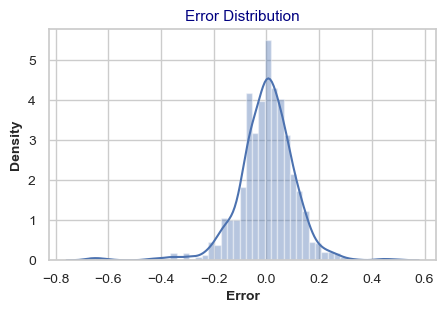

In [767]:
res_l = y_train - y_train_pred_l
plt.figure(figsize=(5,3))
fig = sns.distplot(res_l)
plt.xlabel("Error",fontweight='bold',fontsize=10)
plt.ylabel('Density',fontweight='bold',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Error Distribution',fontdict={"fontsize":11, "color":"#000080"})
plt.show()

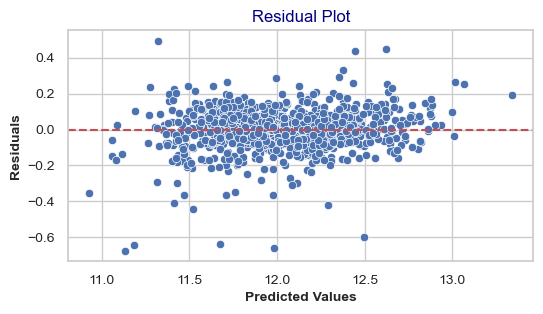

In [768]:
#Homoscedasticity & Linearity
#Homoscedasticity: The variance of residuals should be constant across all levels of the independent variables, 
#indicating consistent levels of variability.
##Linearity - points should fall approximately along the reference line indicating linear relationship
plt.figure(figsize=(6,3))
sns.scatterplot(x = y_train_pred_l, y = res_l)
plt.xlabel('Predicted Values',fontweight='bold',fontsize=10)
plt.ylabel('Residuals',fontweight='bold',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Residual Plot',fontdict={"fontsize":12, "color":"#000080"})
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

In [769]:
#Visualize the trained model with a linear regression fit line 

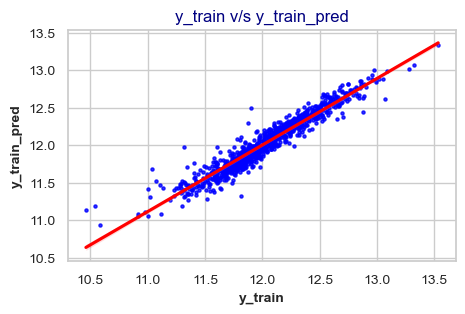

In [770]:
# Visualize the trained model using a scatter plot with a linear regression fit line
plt.figure(figsize=(5,3))
sns.regplot(x = y_train, y = y_train_pred_l, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 5, 'color': 'blue' })
# Show the plot
plt.title('y_train v/s y_train_pred',fontdict={"fontsize":12, "color":"#000080"})
plt.xlabel('y_train',fontweight='bold',fontsize=10)
plt.ylabel('y_train_pred',fontweight='bold',fontsize=10) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

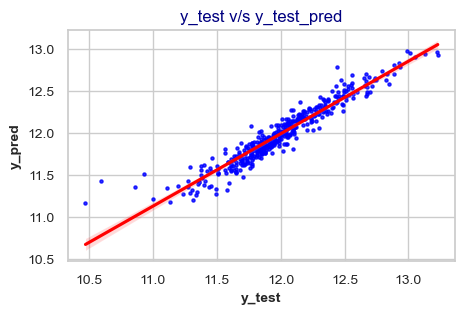

In [771]:
# Visualize the model on Test data using a scatter plot with a linear regression fit line
plt.figure(figsize=(5,3))
sns.regplot(x = y_test, y = y_pred_l, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 5, 'color': 'blue' })

# Show the plot
plt.title('y_test v/s y_test_pred',fontdict={"fontsize":12, "color":"#000080"})
plt.xlabel('y_test',fontweight='bold',fontsize=10)
plt.ylabel('y_pred',fontweight='bold',fontsize=10) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [772]:
# All the Assumptions of Linear Model is met